<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Machine%20Learning/ML_Project_Time_Series_Analysis_SalesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
from math import sqrt

import matplotlib.pyplot as plt

from itertools import product

from pylab import rcParams

from scipy.stats import boxcox

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


###Install External Libraries

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.2 MB/s eta 0:00:00


In [ ]:
!pip install tbats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 917.7 kB/s eta 0:00:00


In [ ]:
!pip install pystan
##!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install prophet

###Import Installed

In [ ]:
from pmdarima import auto_arima

from tbats import TBATS, BATS

from prophet import Prophet

##EDA

###Download Dataset

In [ ]:
!gdown '1_ZZ5H_Yh3xcGtAfJRJunOu6yMwjxKfTp'

Downloading...
From: https://drive.google.com/uc?id=1_ZZ5H_Yh3xcGtAfJRJunOu6yMwjxKfTp
To: /content/1000000 Sales Records.csv
100% 125M/125M [00:03<00:00, 39.0MB/s]


###DF and EDA

In [ ]:
df = pd.read_csv('1000000 Sales Records.csv')
df.head()

Region           Country  Item Type Sales Channel  \
0            Sub-Saharan Africa      South Africa     Fruits       Offline   
1  Middle East and North Africa           Morocco    Clothes        Online   
2         Australia and Oceania  Papua New Guinea       Meat       Offline   
3            Sub-Saharan Africa          Djibouti    Clothes       Offline   
4                        Europe          Slovakia  Beverages       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M   7/27/2012  443368995   7/28/2012        1593        9.33   
1              M   9/14/2013  667593514  10/19/2013        4611      109.28   
2              M   5/15/2015  940995585    6/4/2015         360      421.89   
3              H   5/17/2017  880811536    7/2/2017         562      109.28   
4              L  10/26/2016  174590194   12/4/2016        3973       47.45   

   Unit Cost  Total Revenue  Total Cost  Total Profit  
0       6.92       14862.69    11023.56       3839.13  
1      35.84      503890.08   165258.24     338631.84  
2     364.69      151880.40   131288.40      20592.00  
3      35.84       61415.36    20142.08      41273.28  
4      31.79      188518.85   126301.67      62217.18

In [ ]:
#adding new column as orderdate from existing by converting to datatime
df['orderdate'] = pd.to_datetime(df['Order Date'])

#adding new column with year and month
df['Order_Month'] = pd.to_datetime(df['orderdate']).dt.to_period('m')

df.head()

Region           Country  Item Type Sales Channel  \
0            Sub-Saharan Africa      South Africa     Fruits       Offline   
1  Middle East and North Africa           Morocco    Clothes        Online   
2         Australia and Oceania  Papua New Guinea       Meat       Offline   
3            Sub-Saharan Africa          Djibouti    Clothes       Offline   
4                        Europe          Slovakia  Beverages       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M   7/27/2012  443368995   7/28/2012        1593        9.33   
1              M   9/14/2013  667593514  10/19/2013        4611      109.28   
2              M   5/15/2015  940995585    6/4/2015         360      421.89   
3              H   5/17/2017  880811536    7/2/2017         562      109.28   
4              L  10/26/2016  174590194   12/4/2016        3973       47.45   

   Unit Cost  Total Revenue  Total Cost  Total Profit  orderdate Order_Month  
0       6.92       14862.69    11023.56       3839.13 2012-07-27     2012-07  
1      35.84      503890.08   165258.24     338631.84 2013-09-14     2013-09  
2     364.69      151880.40   131288.40      20592.00 2015-05-15     2015-05  
3      35.84       61415.36    20142.08      41273.28 2017-05-17     2017-05  
4      31.79      188518.85   126301.67      62217.18 2016-10-26     2016-10

In [ ]:
#checking month's unique values in ascending order
sorted(df['Order_Month'].unique())

[Period('2010-01', 'M'),
 Period('2010-02', 'M'),
 Period('2010-03', 'M'),
 Period('2010-04', 'M'),
 Period('2010-05', 'M'),
 Period('2010-06', 'M'),
 Period('2010-07', 'M'),
 Period('2010-08', 'M'),
 Period('2010-09', 'M'),
 Period('2010-10', 'M'),
 Period('2010-11', 'M'),
 Period('2010-12', 'M'),
 Period('2011-01', 'M'),
 Period('2011-02', 'M'),
 Period('2011-03', 'M'),
 Period('2011-04', 'M'),
 Period('2011-05', 'M'),
 Period('2011-06', 'M'),
 Period('2011-07', 'M'),
 Period('2011-08', 'M'),
 Period('2011-09', 'M'),
 Period('2011-10', 'M'),
 Period('2011-11', 'M'),
 Period('2011-12', 'M'),
 Period('2012-01', 'M'),
 Period('2012-02', 'M'),
 Period('2012-03', 'M'),
 Period('2012-04', 'M'),
 Period('2012-05', 'M'),
 Period('2012-06', 'M'),
 Period('2012-07', 'M'),
 Period('2012-08', 'M'),
 Period('2012-09', 'M'),
 Period('2012-10', 'M'),
 Period('2012-11', 'M'),
 Period('2012-12', 'M'),
 Period('2013-01', 'M'),
 Period('2013-02', 'M'),
 Period('2013-03', 'M'),
 Period('2013-04', 'M'),


In [ ]:
#aggregation over original dataframe on month column using revenue, cost and profit with sum aggregate function
df_agg = df.groupby(['Order_Month'], as_index=False).agg({'Total Revenue': "sum", 'Total Cost': "sum", 'Total Profit': "sum"})

In [ ]:
#converting value to million
df_agg['Total Revenue'] = df_agg['Total Revenue']/1000000
df_agg['Total Cost'] = df_agg['Total Cost']/1000000
df_agg['Total Profit'] = df_agg['Total Profit']/1000000

df_agg

Order_Month  Total Revenue    Total Cost  Total Profit
0      2010-01   14547.786773  10259.179775   4288.606999
1      2010-02   13463.186840   9526.252432   3936.934408
2      2010-03   14712.532049  10377.312275   4335.219774
3      2010-04   14429.823464  10190.636550   4239.186914
4      2010-05   14931.168615  10531.010842   4400.157773
..         ...            ...           ...           ...
86     2017-03   14642.602650  10311.719664   4330.882987
87     2017-04   14570.593984  10254.995452   4315.598533
88     2017-05   14943.426668  10559.199632   4384.227036
89     2017-06   14352.098946  10116.164782   4235.934164
90     2017-07   13769.014644   9703.800090   4065.214553

[91 rows x 4 columns]

In [ ]:
#using month as an index value
df_agg = df_agg.set_index('Order_Month')
df_agg

Total Revenue    Total Cost  Total Profit
Order_Month                                           
2010-01       14547.786773  10259.179775   4288.606999
2010-02       13463.186840   9526.252432   3936.934408
2010-03       14712.532049  10377.312275   4335.219774
2010-04       14429.823464  10190.636550   4239.186914
2010-05       14931.168615  10531.010842   4400.157773
...                    ...           ...           ...
2017-03       14642.602650  10311.719664   4330.882987
2017-04       14570.593984  10254.995452   4315.598533
2017-05       14943.426668  10559.199632   4384.227036
2017-06       14352.098946  10116.164782   4235.934164
2017-07       13769.014644   9703.800090   4065.214553

[91 rows x 3 columns]

In [ ]:
print(f'data type of index (Order_Month) column: {df_agg.index.dtype}')

#changing that to timestamp from period
df_agg.index = df_agg.index.to_timestamp()

print(f'updated data type of index (Order_Month) column: {df_agg.index.dtype}')

print(f'size of dataframe (number of observations after aggregation): {len(df_agg)}')

data type of index (Order_Month) column: period[M]
updated data type of index (Order_Month) column: datetime64[ns]
size of dataframe (number of observations after aggregation): 91


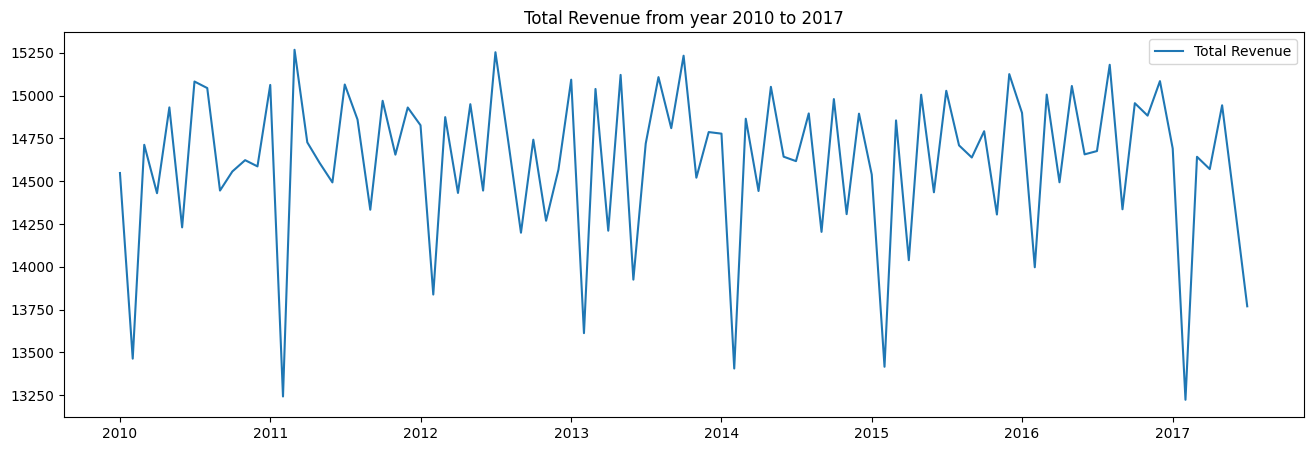

In [ ]:
#plotting function
#def plot_df(df_superstore, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#    plt.figure(figsize=(14,6), dpi=dpi)
#    plt.plot(x, y, color='#F94144')
#    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#    plt.show()

#plot_df(df_agg, x=df_agg.index, y=df_agg['Total Profit'], title='Monthly sales')

#plotting Total Revenue with index as Order_Month
plt.figure(figsize=(16,5))
plt.plot(df_agg.index, df_agg['Total Revenue'], label = "Total Revenue")
plt.legend(loc='best')
plt.title("Total Revenue from year 2010 to 2017")
plt.show()

##Stationarity Check - What & Why

It is important to check as most statistical models support only stationary datasets.

If a dataset doesn't have Trend, Seasonality, Cyclical, and Irregularity components of the time series, then it's Stationary.
--Constant mean value; constant variance with time-frame &

If either the mean-variance or covariance (relationship between two variables) is changing with respect to time, the dataset is called non-stationary.

###Decompose Time Series (Check Trend, Season, Cycle, Irregularities (random error))

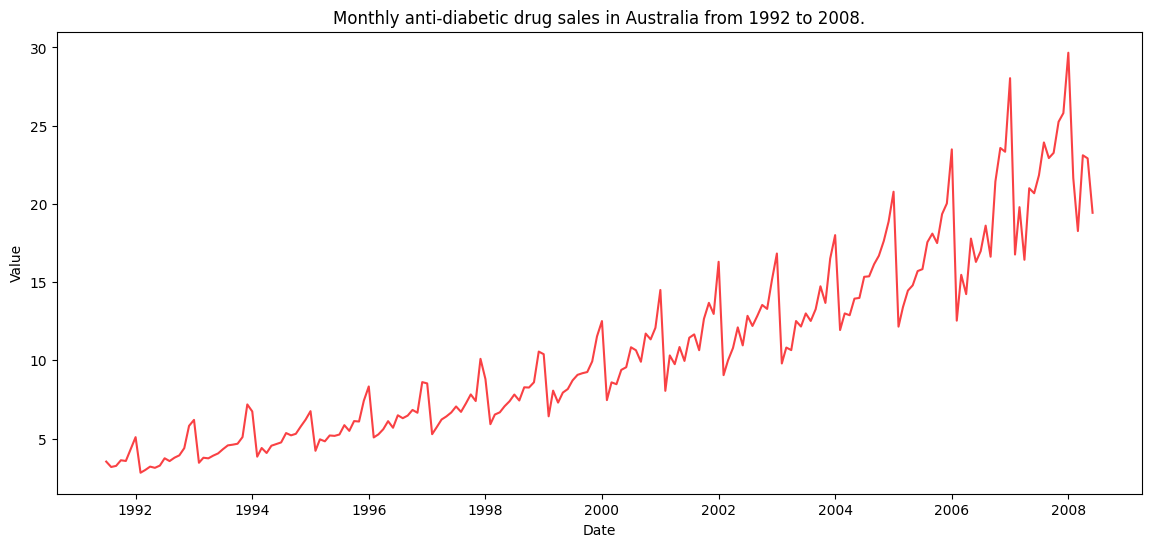

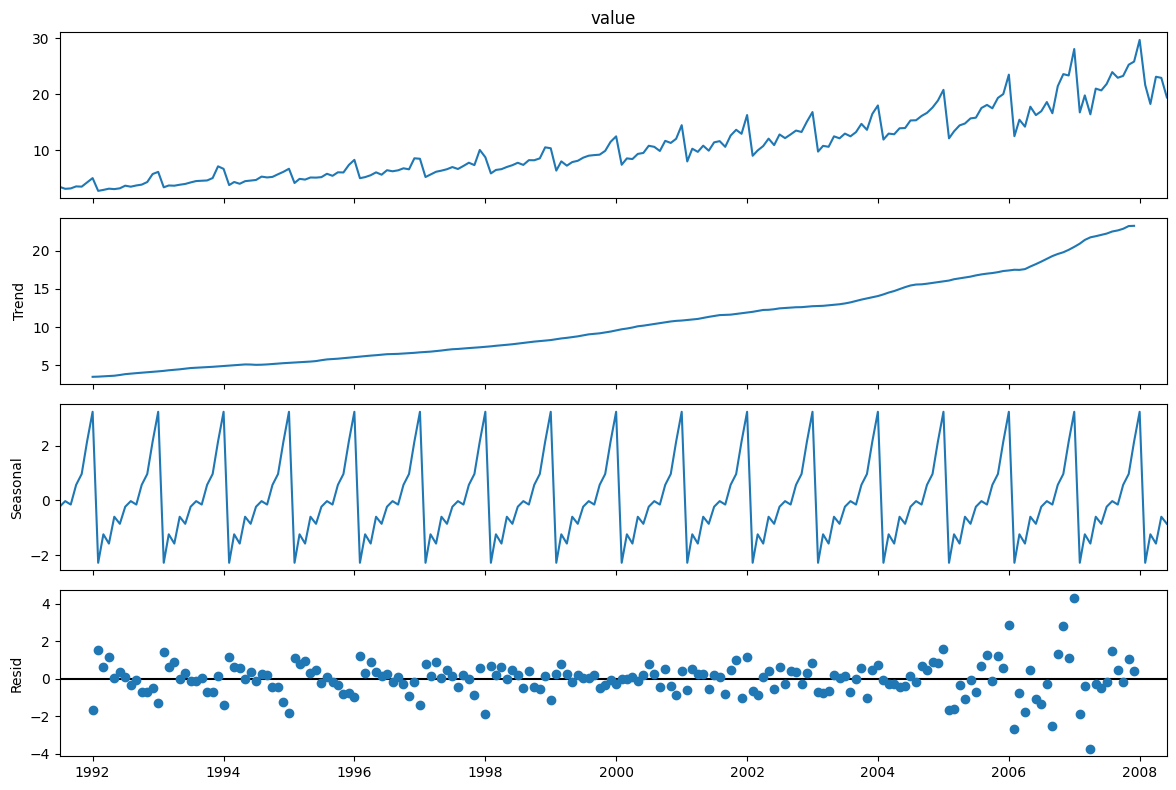

In [ ]:
#good example to understand mentioned terms - drug dataset

aust_drug_df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(14,6), dpi=dpi)
    plt.plot(x, y, color='#F94144')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(aust_drug_df, x=aust_drug_df.index, y=aust_drug_df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(aust_drug_df.value, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

###Decomposing our sales dataset

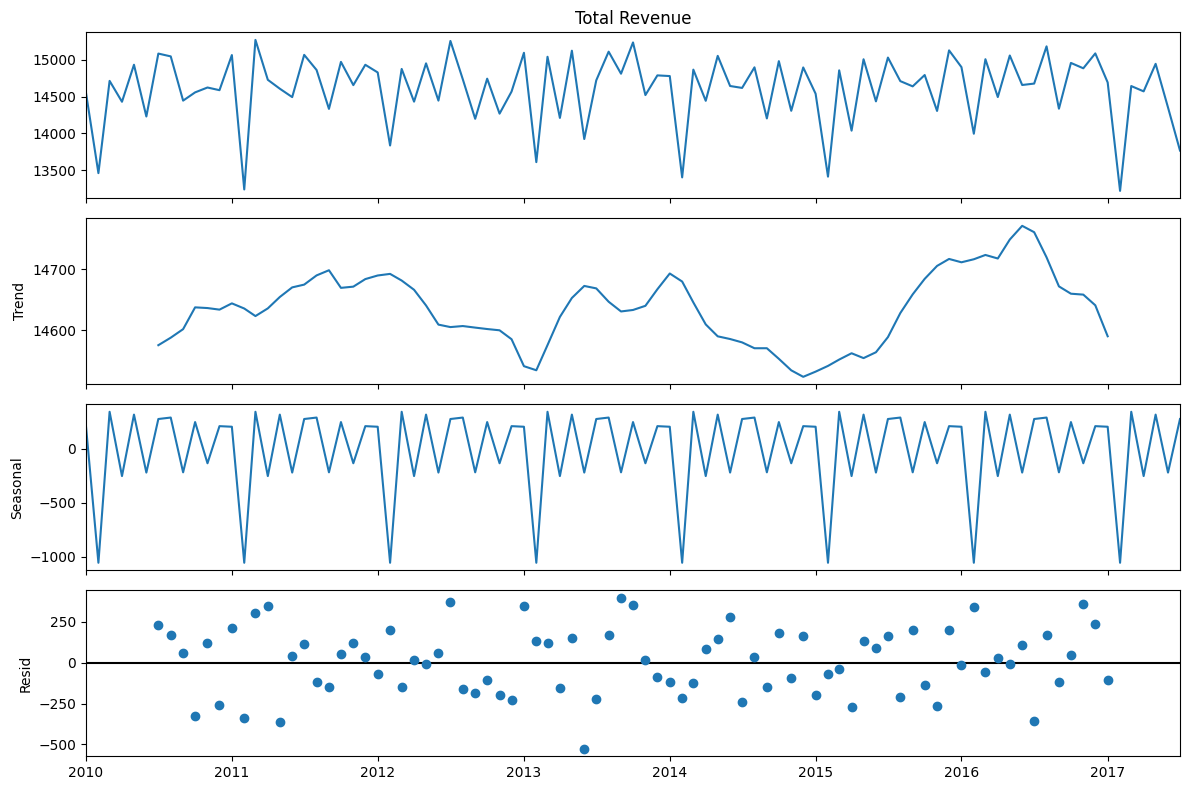

In [ ]:
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df_agg['Total Revenue'], model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()


###ADF - Augmented Dickey–Fuller test

ADF test is conducted with the following assumptions:


Null Hypothesis (HO): Series is non-stationary, or series has a unit root.

Alternate Hypothesis(HA): Series is stationary, or series has no unit root.


Conditions to Reject Null Hypothesis(HO)

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.


non-stationary p > alpha 0.05 --  failed to reject null hypothesis

In [ ]:
#defined function for ADF test
def adf_test(datasetSeries):
    print('\nResults of Dickey-Fuller Test (ADF) with AIC as metric:')
    adfullertest = adfuller(datasetSeries, autolag='AIC')
    adfoutput = pd.Series(adfullertest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in adfullertest[4].items():
      adfoutput['Critical Value (%s)'%key] = value
    print(adfoutput)


In [ ]:
#running this test with the help of above function
adf_test(df_agg['Total Revenue'])


Results of Dickey-Fuller Test (ADF) with AIC as metric:
Test Statistic                 -2.155848
p-value                         0.222658
#Lags Used                     11.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


**Observation:**

here p-value is > alpha (.05), hence, we failed to reject the null-hypothesis which means the series is non-stationary.

###KPSS - Kwiatkowski–Phillips–Schmidt–Shin test

The KPSS test is conducted with the following assumptions.

Null Hypothesis (HO): Series is trend stationary or series has no unit root.

Alternate Hypothesis(HA): Series is non-stationary, or series has a unit root.


Note: The hypothesis is reversed in the KPSS test compared to ADF Test.


If the null hypothesis is failed to be rejected, this test may provide evidence that the series is trend stationary.


Conditions to Fail to Reject Null Hypothesis(HO)


If the Test Statistic < Critical Value and p-value < 0.05 – Fail to Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is trend stationary.

 p > .05 -- failed to reject null hypothesis

 --which means, it is trend stationary

In [ ]:
#defined function for ADF test
def kpss_test(datasetSeries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(datasetSeries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', '#Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
#running this test with the help of above function
kpss_test(df_agg['Total Revenue'])

Results of KPSS Test:
Test Statistic           0.042469
p-value                  0.100000
#Lags Used               2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-25-d5c9cf2c85a8>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(datasetSeries, regression='c', nlags="auto")


Note:

The following are the possible outcomes of applying both tests.

Case 1: Both tests conclude that the given series is stationary – The series is stationary

Case 2: Both tests conclude that the given series is non-stationary – The series is non-stationary

Case 3: ADF concludes non-stationary, and KPSS concludes stationary – The series is trend stationary.
To make the series strictly stationary, the trend needs to be removed in this case. Then the detrended series is checked for stationarity.

Case 4: ADF concludes stationary, and KPSS concludes non-stationary – The series is difference stationary.
Differencing is to be used to make series stationary. Then the differenced series is checked for stationarity.

##Convert time-series from non-stationary to stationary - How

in order to use models for predictions

* Differencing

* Transformation (log, BoxCox)

###Differencing

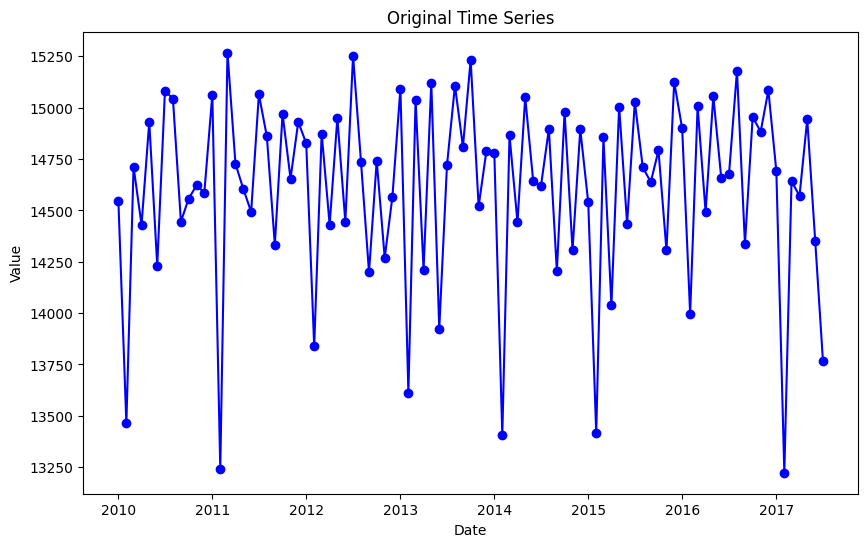

In [ ]:
#plotting original time series
plt.figure(figsize=(10, 6))
plt.plot(df_agg['Total Revenue'], marker='o', linestyle='-', color='b')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

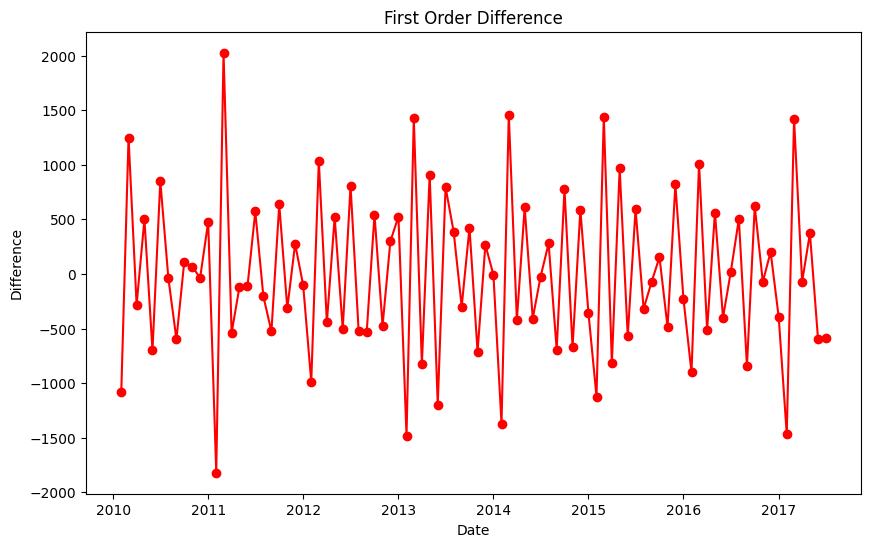

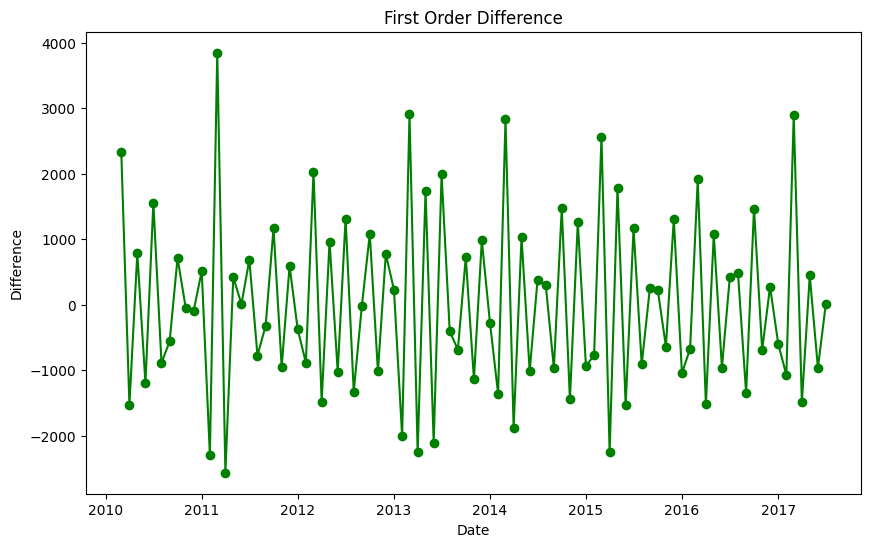

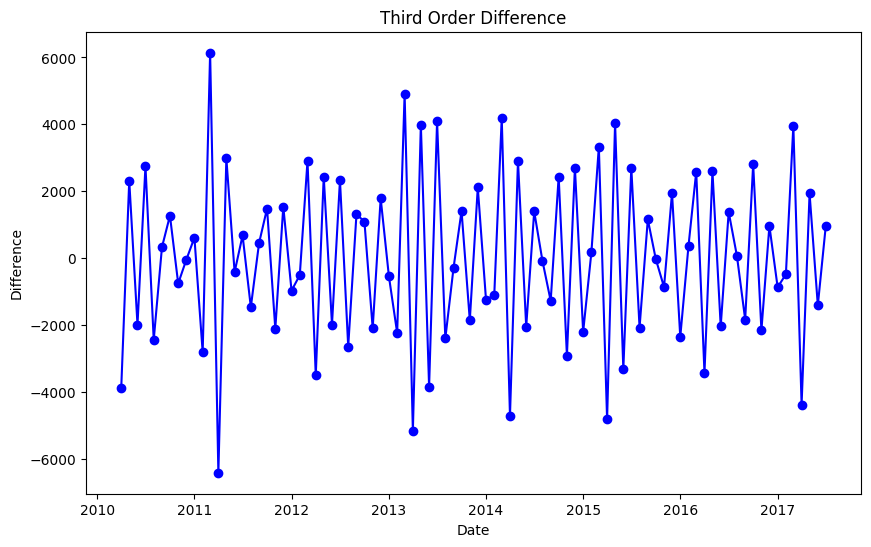

In [ ]:
#performing differencing once
first_difference = df_agg['Total Revenue'].diff().dropna()

# Perform differencing two times
second_difference = df_agg['Total Revenue'].diff().diff().dropna()

# Perform differencing three times
third_difference = df_agg['Total Revenue'].diff().diff().diff().dropna()

#plotting first order difference
plt.figure(figsize=(10, 6))
plt.plot(first_difference, marker='o', linestyle='-', color='r')
plt.title('First Order Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

#plotting second order difference
plt.figure(figsize=(10, 6))
plt.plot(second_difference, marker='o', linestyle='-', color='g')
plt.title('First Order Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

# Plot the third order difference
plt.figure(figsize=(10, 6))
plt.plot(third_difference, marker='o', linestyle='-', color='b')
plt.title('Third Order Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

In [ ]:
#adf_test(df_agg['Total Revenue'])

In [ ]:
#df_agg['RevenueDiff1'] = df_agg['Total Revenue'].diff().fillna(0)
#df_agg

In [ ]:
#adf_test(df_agg['Total Revenue'].diff().dropna())

###Transformation - BoxCox

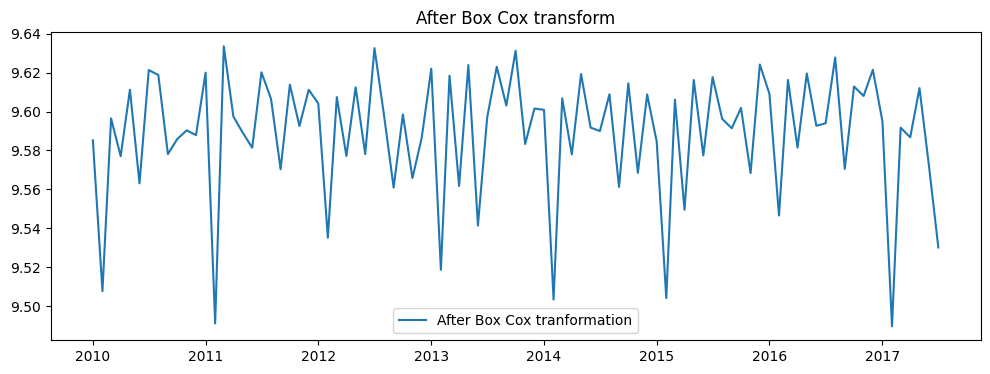

In [ ]:
data_boxcox = pd.Series(boxcox(df_agg['Total Revenue'], lmbda=0), index = df_agg.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [ ]:
#adf_test(data_boxcox)

###BoxCox with differencing

In [ ]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df_agg.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

data_boxcox_diff.dropna(inplace=True) # After shifting the data, drop the first value which is NA

#adf_test(data_boxcox_diff)

In [ ]:
#kpss_test(data_boxcox_diff)

###Moving ahead with differencing
Checking Stationarity after first order differencing

In [ ]:
#performing differencing once
df_agg['RevenueDiff1'] = df_agg['Total Revenue'].diff().fillna(0)
df_agg


Total Revenue    Total Cost  Total Profit  RevenueDiff1
Order_Month                                                         
2010-01-01    14547.786773  10259.179775   4288.606999      0.000000
2010-02-01    13463.186840   9526.252432   3936.934408  -1084.599933
2010-03-01    14712.532049  10377.312275   4335.219774   1249.345209
2010-04-01    14429.823464  10190.636550   4239.186914   -282.708586
2010-05-01    14931.168615  10531.010842   4400.157773    501.345152
...                    ...           ...           ...           ...
2017-03-01    14642.602650  10311.719664   4330.882987   1419.682001
2017-04-01    14570.593984  10254.995452   4315.598533    -72.008666
2017-05-01    14943.426668  10559.199632   4384.227036    372.832684
2017-06-01    14352.098946  10116.164782   4235.934164   -591.327722
2017-07-01    13769.014644   9703.800090   4065.214553   -583.084302

[91 rows x 4 columns]

###Checking Stationarity

In [ ]:
print('Performing ADF Test for both original and differenced data:')
adf_test(df_agg['Total Revenue'])
print()
adf_test(df_agg['RevenueDiff1'])
print('\n\n')


print('Performing KPSS Test for both original and differenced data:')
kpss_test(df_agg['Total Revenue'])
print()
kpss_test(df_agg['RevenueDiff1'])

Performing ADF Test for both original and differenced data:

Results of Dickey-Fuller Test (ADF) with AIC as metric:
Test Statistic                 -2.155848
p-value                         0.222658
#Lags Used                     11.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


Results of Dickey-Fuller Test (ADF) with AIC as metric:
Test Statistic                -7.252249e+00
p-value                        1.767620e-10
#Lags Used                     1.000000e+01
Number of Observations Used    8.000000e+01
Critical Value (1%)           -3.514869e+00
Critical Value (5%)           -2.898409e+00
Critical Value (10%)          -2.586439e+00
dtype: float64



Performing KPSS Test for both original and differenced data:
Results of KPSS Test:
Test Statistic           0.042469
p-value                  0.100000
#Lags Used               2.000000
Critical Val

<ipython-input-25-d5c9cf2c85a8>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(datasetSeries, regression='c', nlags="auto")
<ipython-input-25-d5c9cf2c85a8>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(datasetSeries, regression='c', nlags="auto")


**Observation:**

ADF returned p-value for original data >.05 which means we failed to reject the null hypothesis (series is stationary)

However, after first order differencing, the p-value is <.05 and we can reject the null hypothesis which claims non-stationarity (series is stationary now)

##Modeling

###Linear Regression (naive approach)

In [ ]:
#resetting index and adding new column timeseq
df_agg.reset_index(inplace=True)

test_reg_df = df_agg.copy()

test_reg_df['TimeSeq'] = np.arange(len(df_agg.index))

test_reg_df.head()

Order_Month  Total Revenue    Total Cost  Total Profit  RevenueDiff1  \
0  2010-01-01   14547.786773  10259.179775   4288.606999      0.000000   
1  2010-02-01   13463.186840   9526.252432   3936.934408  -1084.599933   
2  2010-03-01   14712.532049  10377.312275   4335.219774   1249.345209   
3  2010-04-01   14429.823464  10190.636550   4239.186914   -282.708586   
4  2010-05-01   14931.168615  10531.010842   4400.157773    501.345152   

   TimeSeq  
0        0  
1        1  
2        2  
3        3  
4        4

In [ ]:
#splitting in train and test
X = test_reg_df.loc[:, ['TimeSeq']]  # features
y = test_reg_df.loc[:, 'Total Revenue']  # target

#model training
model = LinearRegression()
model.fit(X, y)

#model prediction
y_pred = pd.Series(model.predict(X), index=X.index)


#visualizing learnt model regression line
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Naive Time Series Learning: Linear Regression');

###Moving to AR - Auto-Regressive Model

In [ ]:
df_agg.set_index('Order_Month', inplace=True)

In [ ]:
lag_plot(df_agg['Total Revenue'])
plt.show()

Yes, random values for AR model

predicted=14940.952495, expected=15180.203861
predicted=14626.611656, expected=14335.875345
predicted=14916.365054, expected=14955.720034
predicted=14181.346272, expected=14883.042133
predicted=14964.573431, expected=15084.654075
predicted=14562.891419, expected=14690.963423
predicted=13893.723641, expected=13222.920650
predicted=14641.730114, expected=14642.602650
predicted=14285.017786, expected=14570.593984
predicted=14856.491630, expected=14943.426668
predicted=14508.968322, expected=14352.098946
predicted=14477.163230, expected=13769.014644

Test RMSE: 379.878



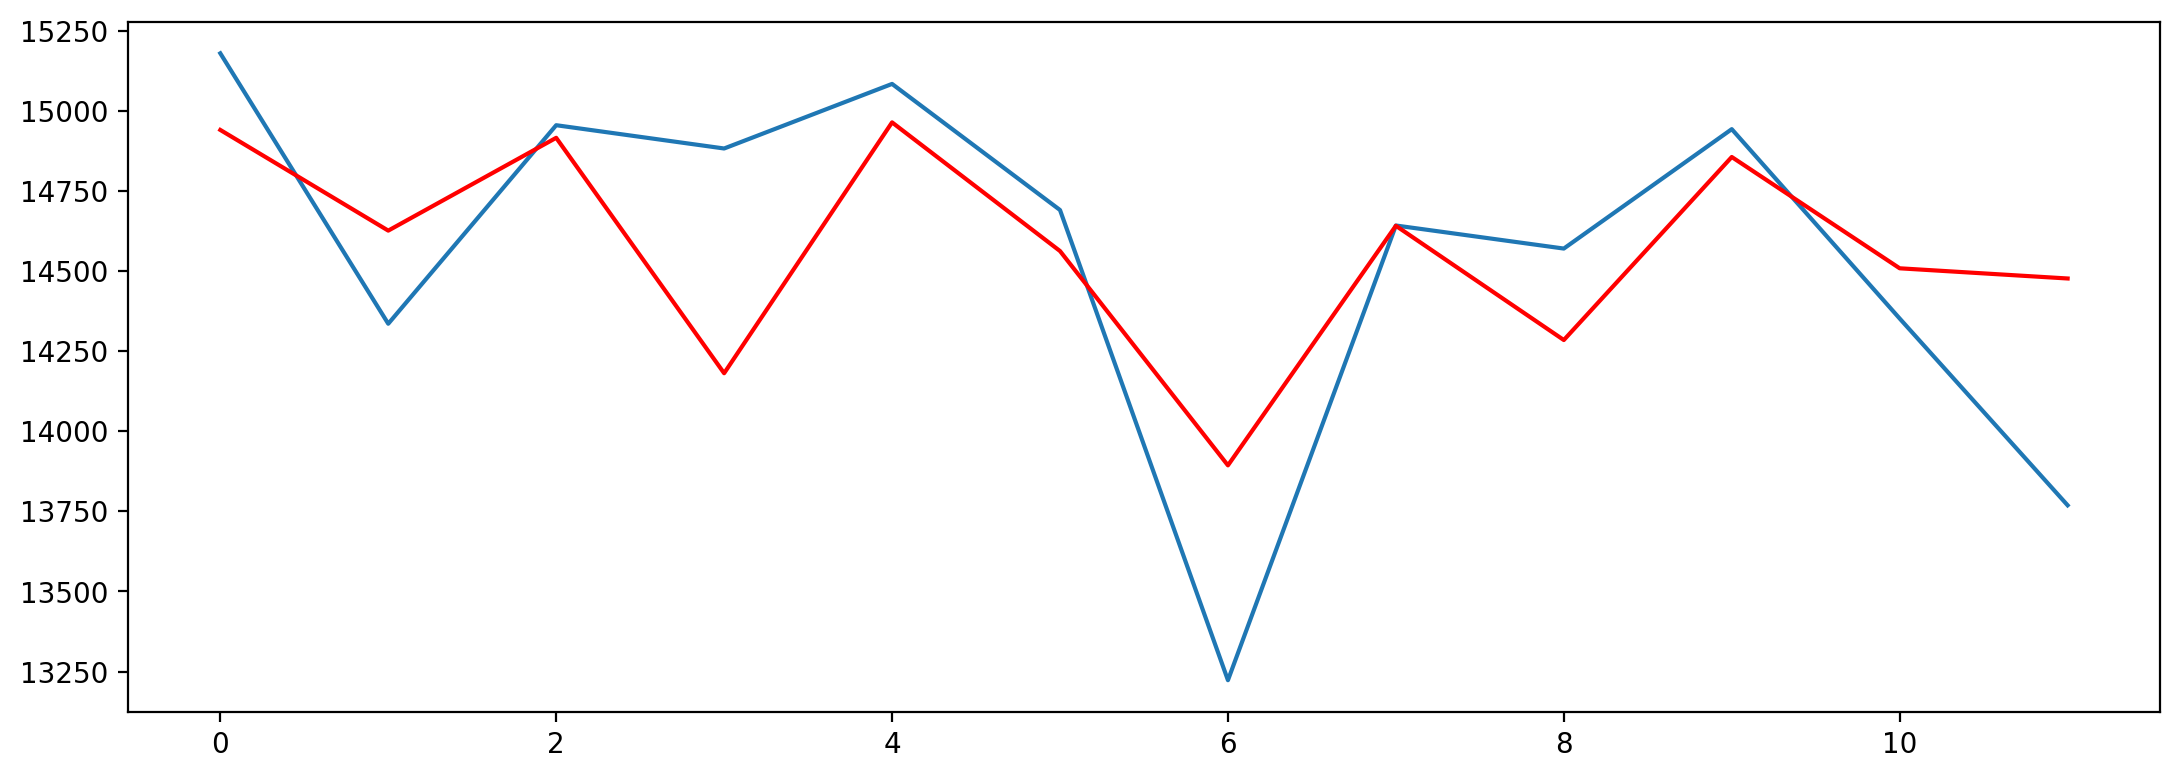

In [ ]:
#split train and test (12 samples to predict)
X = df_agg['Total Revenue'].values
train, test = X[1:len(X)-12], X[len(X)-12:]

#training AR model with 20 lags (p)
model = AutoReg(train, lags=20)
model_fit = model.fit()
##print('Coefficients: %s' % model_fit.params)

#model predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
  print('predicted=%f, expected=%f' % (predictions[i], test[i]))

#using rmse as evaluation metrix
rmse = sqrt(mean_squared_error(test, predictions))
print('\nTest RMSE: %.3f\n' % rmse)

#plotting results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Observation

Expected (blue) Against Predicted (red). The forecast looks good on the 2nd month and the deviation on the 7th and 12th month.

###Auto-Regressive Model with first order differencing

In [ ]:
#split train and test
X = df_agg['RevenueDiff1'].values
train, test = X[1:len(X)-12], X[len(X)-12:]

#training AR model
model = AutoReg(train, lags=20)
model_fit = model.fit()
#print('Coefficients: %s' % model_fit.params)

#model predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = sqrt(mean_squared_error(test, predictions))
print('\nTest RMSE: %.3f\n' % rmse)

#plotting results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=224.867322, expected=504.166831
predicted=-278.867184, expected=-844.328516
predicted=353.017827, expected=619.844689
predicted=-634.652497, expected=-72.677901
predicted=857.492438, expected=201.611942
predicted=-348.030656, expected=-393.690652
predicted=-638.062385, expected=-1468.042773
predicted=729.884283, expected=1419.682001
predicted=-436.653149, expected=-72.008666
predicted=537.981229, expected=372.832684
predicted=-337.192254, expected=-591.327722
predicted=2.036366, expected=-583.084302

Test RMSE: 495.724



###MA - Moving Average Model

Comparing original and differenced data with exponential moving average

In [ ]:
#original data points

#exponential moving average smoothing factor - 0.1
df_agg['EMA_0.1'] = df_agg['Total Revenue'].ewm(alpha=0.1, adjust=False).mean()
#smoothing factor  - 0.3
df_agg['EMA_0.3'] = df_agg['Total Revenue'].ewm(alpha=0.3, adjust=False).mean()

# green - Original Monthly Revenue, red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['green', 'red', 'blue']
df_agg[['Total Revenue', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Total Revenue', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('The Monthly Total Revenue', fontsize=20)
plt.xlabel('Year-Month', fontsize=16)
plt.ylabel('Revenue (millions)', fontsize=16)

Text(0, 0.5, 'Revenue (millions)')

In [ ]:
#differenced data points

#exponential moving average smoothing factor - 0.1
df_agg['EMA_0.1'] = df_agg['RevenueDiff1'].ewm(alpha=0.1, adjust=False).mean()
#smoothing factor  - 0.3
df_agg['EMA_0.3'] = df_agg['RevenueDiff1'].ewm(alpha=0.3, adjust=False).mean()

# green - differenced revenue points, red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['green', 'red', 'blue']
df_agg[['RevenueDiff1', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Differenced Revenue', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('The Monthly Differenced Revenue', fontsize=20)
plt.xlabel('Year-Month', fontsize=16)
plt.ylabel('Revenue (millions)', fontsize=16)

Text(0, 0.5, 'Revenue (millions)')

In [ ]:
#Comparing Simple moving average with exponential moving average (with weights)
alpha= 0.3
n = 12
w_sma = np.repeat(1/n, n)
colors = ['green', 'yellow']

# weights - exponential moving average alpha=0.3 adjust=False
w_ema = [(1-alpha)**i if i==n-1 else alpha*(1-alpha)**i for i in range(n)]

pd.DataFrame({'w_sma': w_sma, 'w_ema': w_ema}).plot(color=colors, kind='bar', figsize=(8,5))
plt.xticks([])
plt.yticks(fontsize=10)
plt.legend(labels=['Simple moving average', 'Exponential moving average (α=0.3)'], fontsize=10)

# title and labels
plt.title('Moving Average Weights', fontsize=10)
plt.ylabel('Weights', fontsize=10)

Text(0, 0.5, 'Weights')

##Function for AR, MA, ARMA & ARIMA

In [ ]:
def arima_calc_rmse_r2(ip_df, col_name, diff_col_name, train_split, p_val, d_val, q_val):
  # split dataset for test and training
  X = ip_df[diff_col_name]
  train, test = X[1:len(X)-train_split], X[len(X)-train_split:]

  # Specify the orders (p, d, q) of the ARIMA model
  p = p_val  # Replace with the desired AR order
  q = q_val  # Replace with the desired MA order
  d = d_val

  # Fit the ARIMA model
  arima_model = ARIMA(train, order=(p, d, q))
  arima_results = arima_model.fit()

  ##print(arima_results.summary())

  # Make predictions
  arima_forecast = arima_results.predict(start=len(train), end=len(train)+len(test)-1)

  rmse = sqrt(mean_squared_error(test, arima_forecast))
  print('Test RMSE: %.3f' % rmse)
  r2s = r2_score(test, arima_forecast)
  print('Test R2: %.3f' % r2s)
  mae = mean_absolute_error(test, arima_forecast)
  print('Test MAE: %.3f' % mae)

  # If differencing was applied, backtransform the forecast to the original scale
  ##original_forecast = arima_forecast.cumsum() + data['your_column'].iloc[-1]

  # If differencing was applied, backtransform the forecast to the original scale
  original_forecast = arima_forecast.cumsum() + ip_df[col_name]

  label_txt = 'ARIMA Forecast for values p = ' + str(p) + ', d = ' + str(d) + ', q = ' + str(q)

  # Plot the original series, differenced series, and the forecast
  plt.plot(ip_df[col_name], label='Original Series')
  #plt.plot(df_agg[diff_col_name], label='Differenced Series', linestyle='dashed')
  plt.plot(original_forecast, label=label_txt, linestyle='dashed')
  plt.legend()
  plt.show()

  return rmse, r2s, mae


In [ ]:
rmserror = []
r2square = []


print('Calling AR Model:')
ar_rmse, ar_r2s, ar_mae = arima_calc_rmse_r2(df_agg, 'Total Revenue', 'RevenueDiff1', 12, 4, 0, 0)
print('\n\n')

print('Calling MA Model:')
ma_rmse, ma_r2s, ma_mae = arima_calc_rmse_r2(df_agg, 'Total Revenue', 'RevenueDiff1', 12, 0, 0, 1)
print('\n\n')





Calling AR Model:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test RMSE: 692.151
Test R2: 0.114
Test MAE: 534.061





Calling MA Model:
Test RMSE: 740.450
Test R2: -0.014
Test MAE: 597.118


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


###Only MA from ARIMA

Calling MA Model with q=2:
Test RMSE: 744.987
Test R2: -0.026
Test MAE: 602.027


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


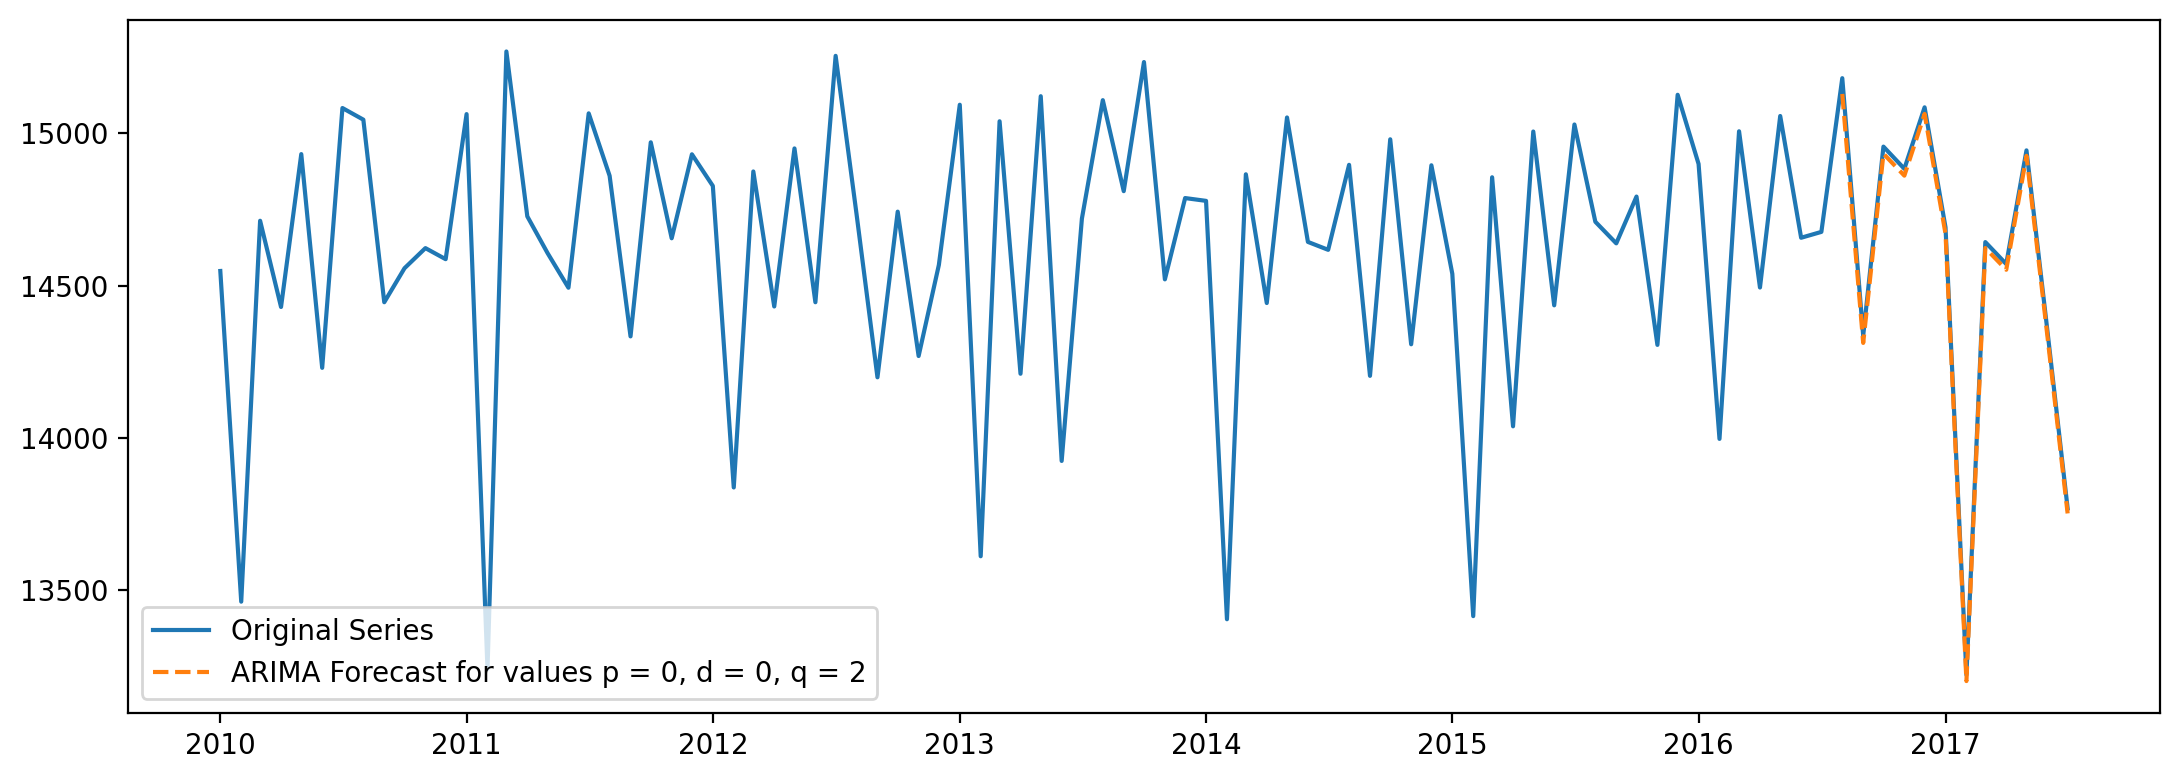

In [ ]:
print('Calling MA Model with q=2:')
ma_rmse, ma_r2s, ma_mae = arima_calc_rmse_r2(df_agg, 'Total Revenue', 'RevenueDiff1', 12, 0, 0, 2)

###ARMA

Calling ARMA Model with p=2 and q=2:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

Test RMSE: 743.016
Test R2: -0.021
Test MAE: 648.108


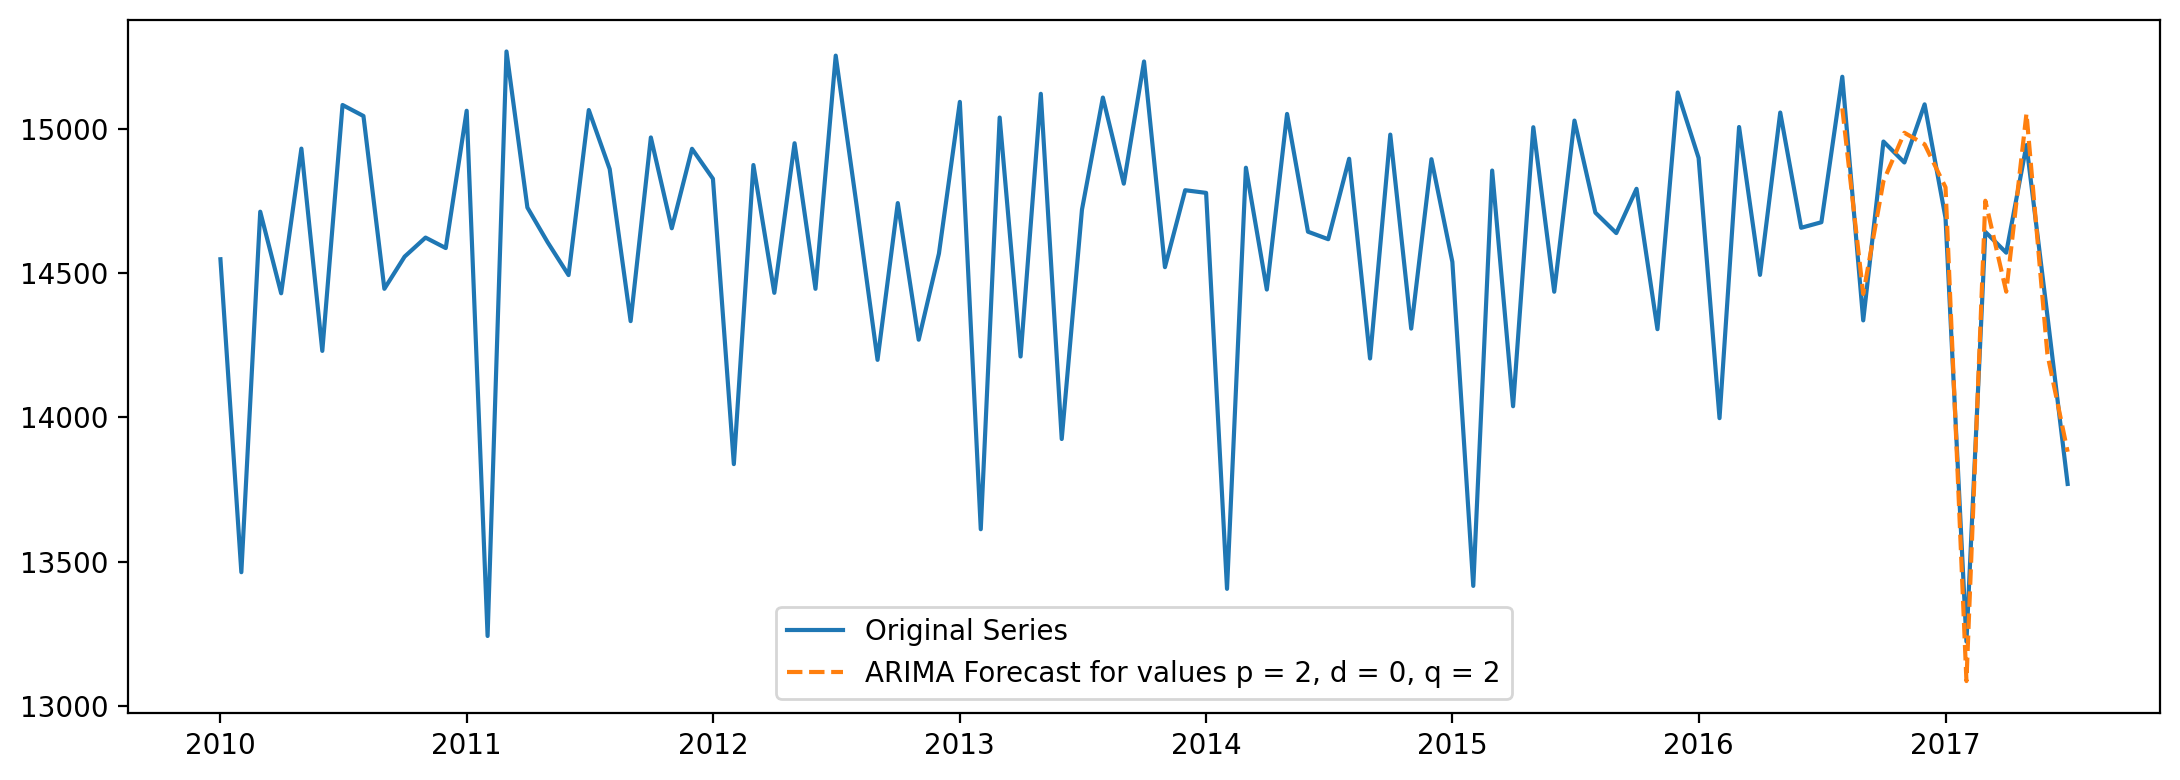

In [ ]:
print('Calling ARMA Model with p=2 and q=2:')
arma_rmse, arma_r2s, arma_mae = arima_calc_rmse_r2(df_agg, 'Total Revenue', 'RevenueDiff1', 12, 2, 0, 2)

###ARIMA

In [ ]:
print('Calling ARIMA Model with p=2, d=1 and q=2:')
arima_rmse, arima_r2s, arima_mae = arima_calc_rmse_r2(df_agg, 'Total Revenue', 'RevenueDiff1', 12, 2, 1, 2)

Calling ARIMA Model with p=2, d=1 and q=2:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 741.809
Test R2: -0.018
Test MAE: 599.068


###SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optim

Test RMSE: 431.838
Test R2: 0.655
Test MAE: 333.449


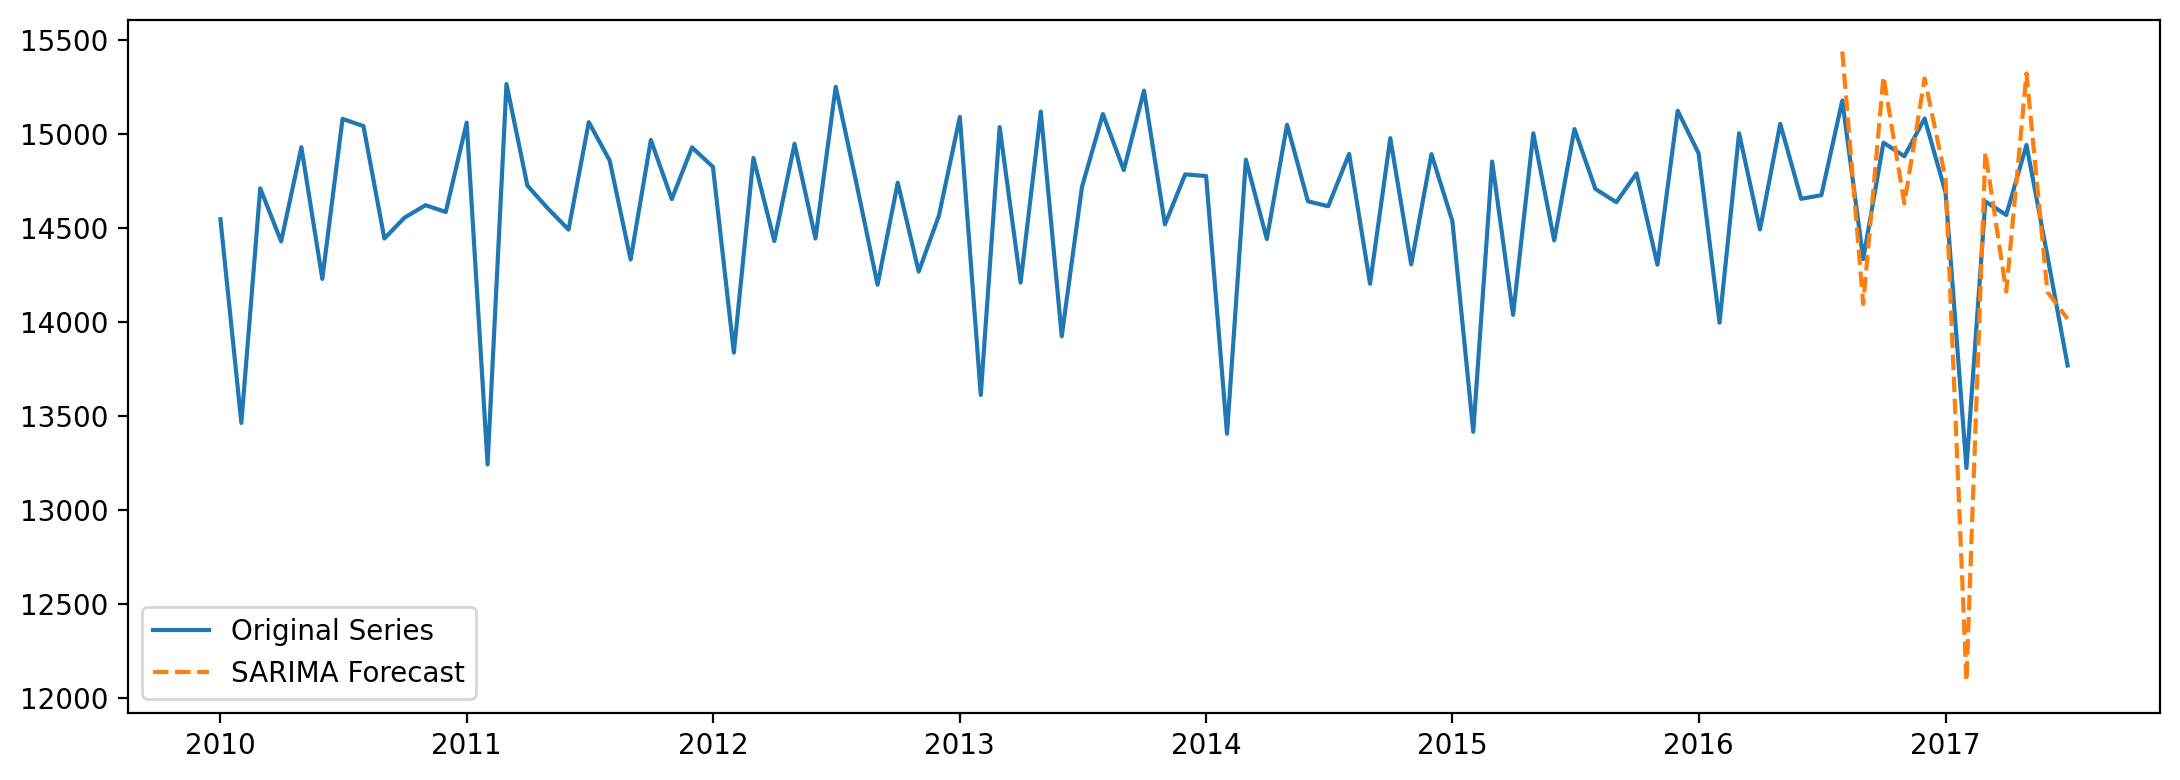

In [ ]:
#split dataset for test and training for differenced data points
X = df_agg['RevenueDiff1']
train, test = X[1:len(X)-12], X[len(X)-12:]

differenced_series = df_agg['RevenueDiff1']


# Specify the orders (p, d, q) and seasonal orders (P, D, Q, S) of the SARIMA model
p = 2  # Replace with the desired AR order
d = 1  # Replace with the desired differencing order
q = 2  # Replace with the desired MA order
P = 1  # Replace with the desired seasonal AR order
D = 1  # Replace with the desired seasonal differencing order
Q = 1  # Replace with the desired seasonal MA order
S = 12  # Replace with the length of the seasonal cycle (e.g., 12 for monthly data)

# Fit the SARIMA model
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_results = sarima_model.fit()

#print(sarima_results.summary())

sarima_forecast = sarima_results.predict(start=len(train), end=len(train)+len(test)-1,)

rmse = sqrt(mean_squared_error(test, sarima_forecast))
print('Test RMSE: %.3f' % rmse)
r2s = r2_score(test, sarima_forecast)
print('Test R2: %.3f' % r2s)
mae = mean_absolute_error(test, sarima_forecast)
print('Test MAE: %.3f' % mae)

#as differencing was applied, need to back transform the forecast to the original scale
original_forecast = sarima_forecast.cumsum() + df_agg['Total Revenue']


# Plot the original series and the forecast
plt.plot(df_agg['Total Revenue'], label='Original Series')
#plt.plot(df_agg['RevenueDiff1'], label='Differenced Series', linestyle='dashed')
plt.plot(original_forecast, label='SARIMA Forecast', linestyle='dashed')
plt.legend()
plt.show()




##Hyperparameter Tuning

###Manual way

In [ ]:
#define the range of values for p, d, and q
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

#generate all possible combinations of p, d, and q
combinations = product(p_values, d_values, q_values)

#initialize variables to store the best model and its performance
best_model = None
best_aic = np.inf  # AIC (Akaike Information Criterion) is used for model comparison

#perform grid search (trying all combinations)
for order in combinations:
    try:
        #fit the ARIMA model
        arima_model = ARIMA(df_agg['RevenueDiff1'], order=order)
        arima_results = arima_model.fit()

        #calculate AIC
        aic = arima_results.aic

        #update best model if the current one has a lower AIC
        if aic < best_aic:
            best_aic = aic
            best_model = arima_results

    except Exception as e:
        #handle exceptions, e.g., if the model does not converge for certain parameters
        print(f"Error for order {order}: {e}")

#print the best model summary
print(best_model.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

                               SARIMAX Results                                
Dep. Variable:           RevenueDiff1   No. Observations:                   91
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -682.294
Date:                Sat, 25 Nov 2023   AIC                           1372.589
Time:                        21:50:44   BIC                           1382.588
Sample:                    01-01-2010   HQIC                          1376.621
                         - 07-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3162      0.153     -2.062      0.039      -0.617      -0.016
ma.L1         -1.9971      0.115    -17.428      0.000      -2.222      -1.772
ma.L2          0.9993      0.113      8.834      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


###Using auto_arima from pmdarima library - with seasonal component False

In [ ]:
#seasonal False - fit stepwise auto-ARIMA
arima_model = auto_arima(df_agg['RevenueDiff1'], start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1463.284, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1411.072, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1400.378, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1398.131, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1383.516, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1385.514, Time=0.08 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 0.984 seconds


###Using auto_arima from pmdarima library - with seasonal component True

In [ ]:
#seasonal True - fit stepwise auto-ARIMA
arima_model = auto_arima(df_agg['RevenueDiff1'], start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1134.159, Time=1.06 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1195.781, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1156.231, Time=0.37 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1193.835, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=2.96 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1147.409, Time=1.25 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=3.49 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1169.217, Time=0.34 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.86 s

##Compare results with best hyperparameters from tuning for ARIMA and SARIMA

Calling ARIMA Model:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test RMSE: 692.151
Test R2: 0.114
Test MAE: 534.061


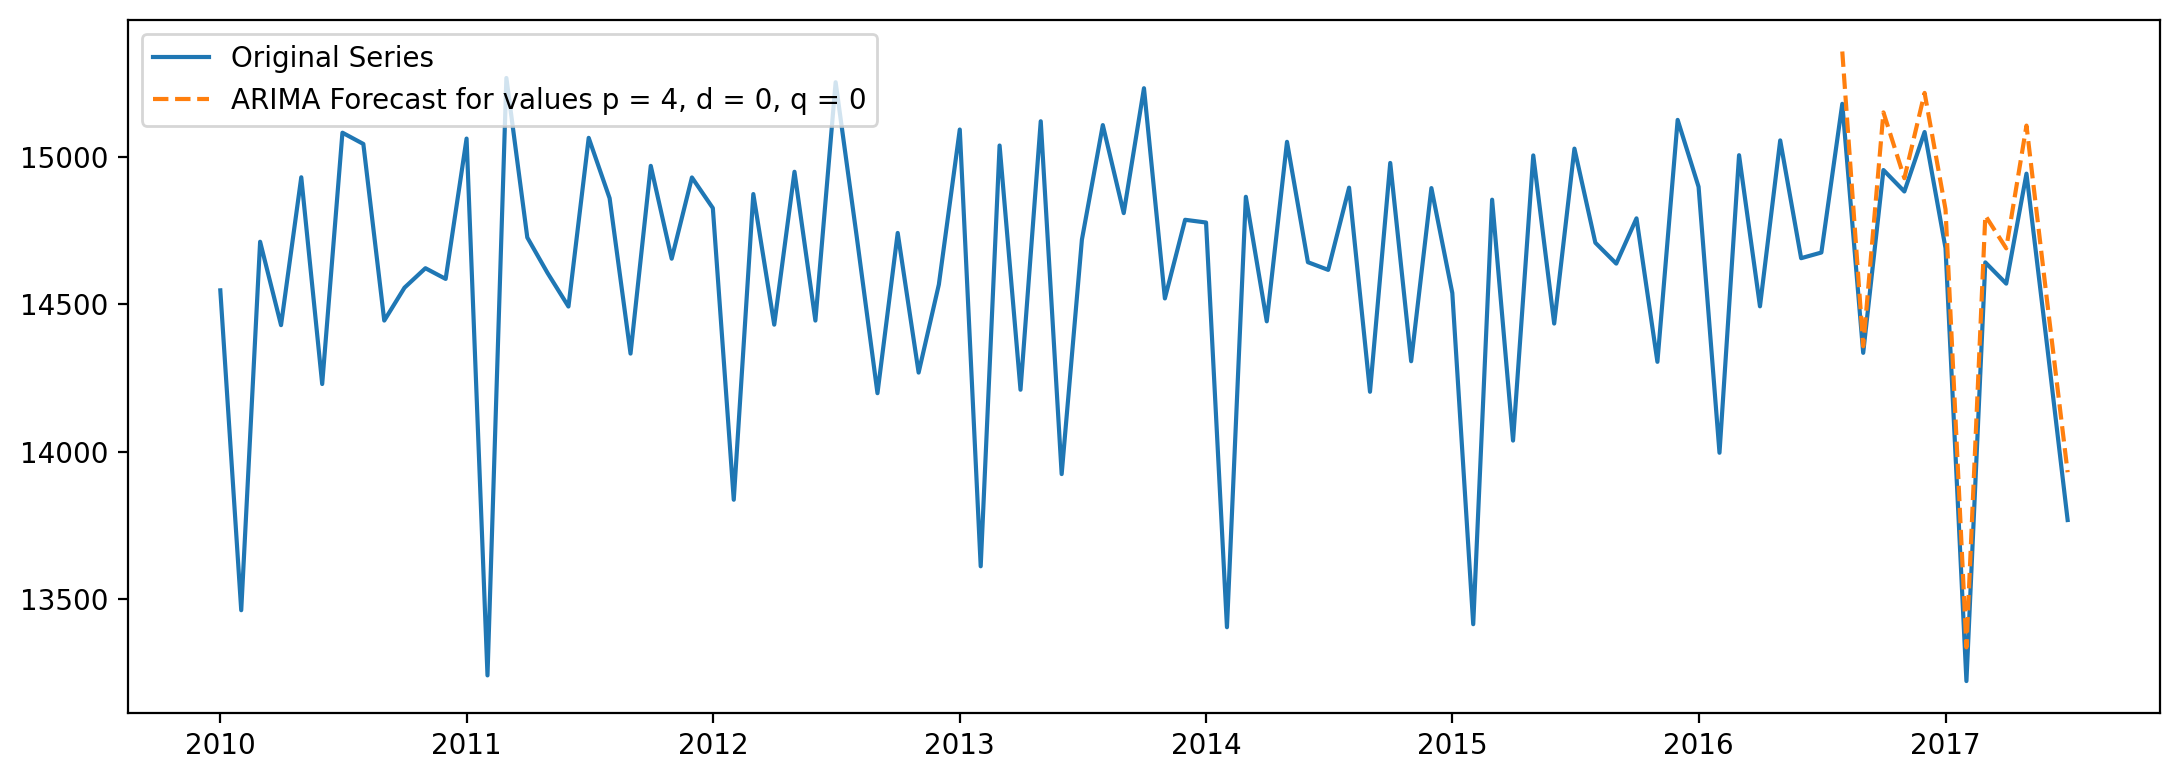

In [ ]:
#Best model:  ARIMA(4,0,0)(0,0,0)[0]
print('Calling ARIMA Model:')
arima_rmse, arima_r2s, arima_mae = arima_calc_rmse_r2(df_agg, 'Total Revenue', 'RevenueDiff1', 12, 4, 0, 0)

SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test RMSE: 412.061
Test R2: 0.686
Test MAE: 320.800


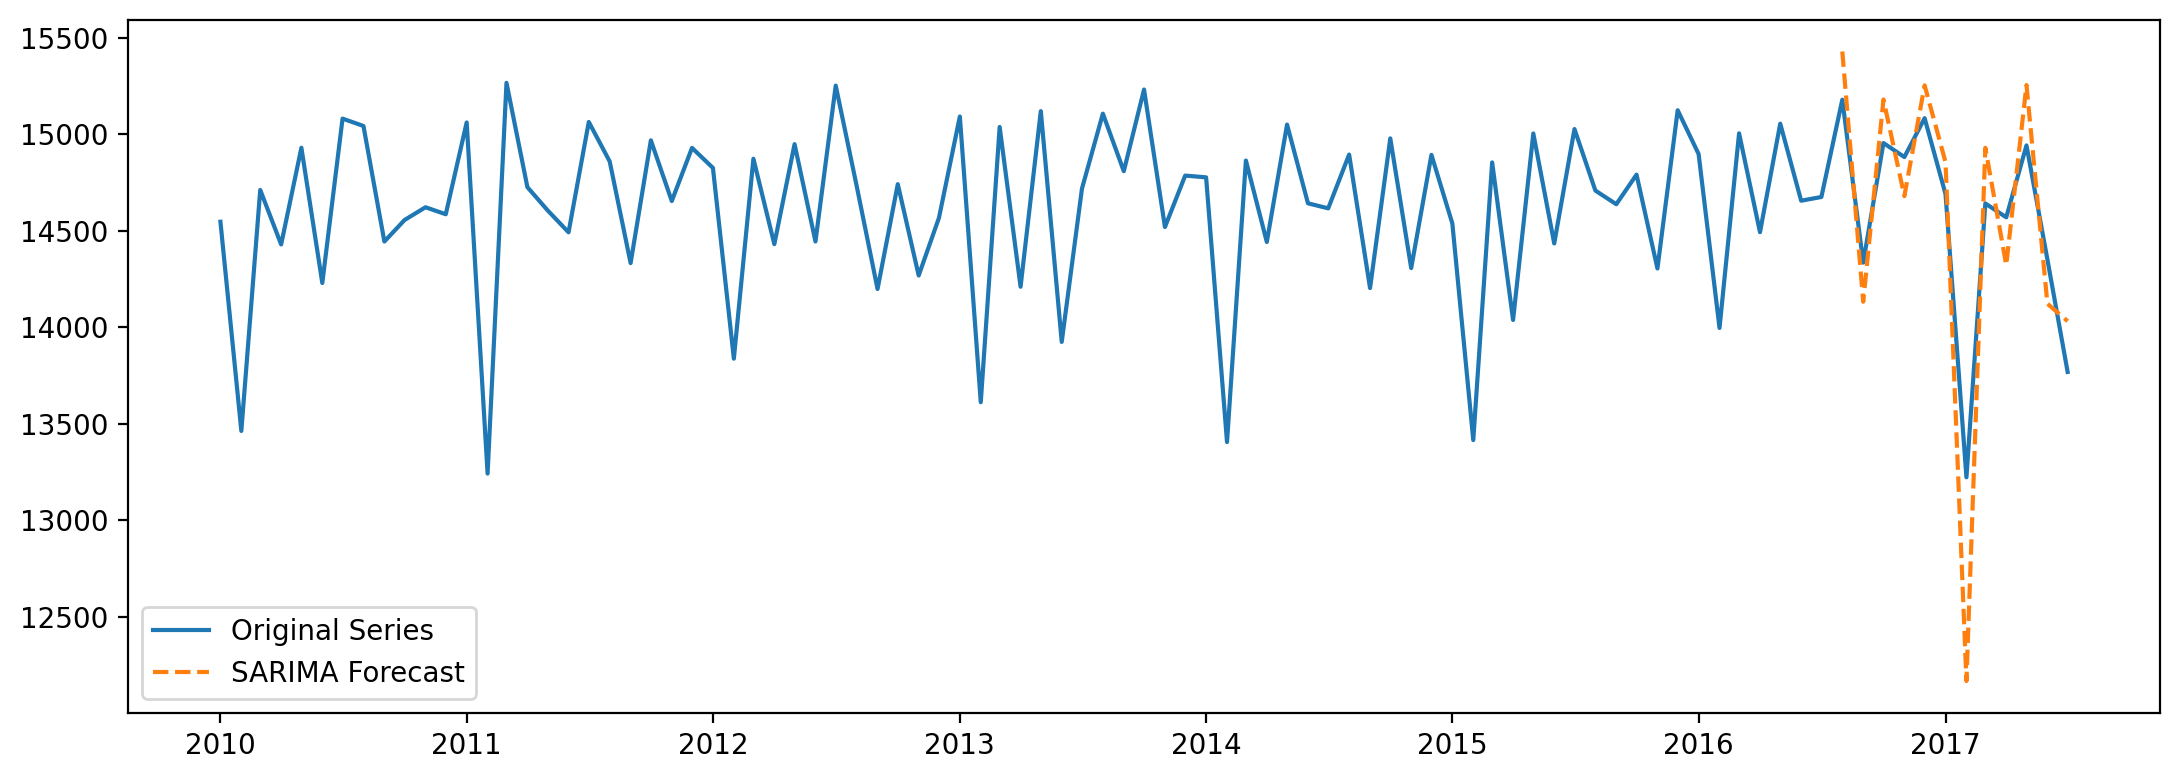

In [ ]:
#Best model:  ARIMA(1,0,1)(0,1,1)[12] intercept

#split dataset for test and training
X = df_agg['RevenueDiff1']
train, test = X[1:len(X)-12], X[len(X)-12:]

differenced_series = df_agg['RevenueDiff1']


# Specify the orders (p, d, q) and seasonal orders (P, D, Q, S) of the SARIMA model
p = 1  # Replace with the desired AR order
d = 0  # Replace with the desired differencing order
q = 1  # Replace with the desired MA order
P = 0  # Replace with the desired seasonal AR order
D = 1  # Replace with the desired seasonal differencing order
Q = 1  # Replace with the desired seasonal MA order
S = 12  # Replace with the length of the seasonal cycle (e.g., 12 for monthly data)

# Fit the SARIMA model
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_results = sarima_model.fit()

#print(sarima_results.summary())

sarima_forecast = sarima_results.predict(start=len(train), end=len(train)+len(test)-1,)

rmse = sqrt(mean_squared_error(test, sarima_forecast))
print('Test RMSE: %.3f' % rmse)
r2s = r2_score(test, sarima_forecast)
print('Test R2: %.3f' % r2s)
mae = mean_absolute_error(test, sarima_forecast)
print('Test MAE: %.3f' % mae)

#as differencing was applied, need to back transform the forecast to the original scale
original_forecast = sarima_forecast.cumsum() + df_agg['Total Revenue']


# Plot the original series and the forecast
plt.plot(df_agg['Total Revenue'], label='Original Series')
plt.plot(original_forecast, label='SARIMA Forecast', linestyle='dashed')
plt.legend()
plt.show()




#Exploring new Libraries

##TBATS

In [ ]:
X = df_agg['Total Revenue']
train, test = X[1:len(X)-12], X[len(X)-12:]

estimator = TBATS(seasonal_periods=(12,))

model_tbats = estimator.fit(train)

y_forecast = model_tbats.forecast(steps=12)


# Summarize fitted model
print('Model Summary:')
print(model_tbats.summary())
print('\n\n')

# Time series analysis
#print('Model Summary:')
#print(model_tbats.y_hat) # in sample prediction
#print('\n\n')
#print(model_tbats.resid) # in sample residuals
#print('\n\n')
#print(model_tbats.aic)
#print('\n\n')

# Reading model parameters
print('Param alpha')
print(model_tbats.params.alpha)

print('\nParam beta')
print(model_tbats.params.beta)

print('\nParam x0')
print(model_tbats.params.x0)

print('\nParam box_cox required')
print(model_tbats.params.components.use_box_cox)

print('\nParam seasonal_harmonics')
print(model_tbats.params.components.seasonal_harmonics)

Model Summary:
Use Box-Cox: True
Use trend: False
Use damped trend: False
Seasonal periods: [12.]
Seasonal harmonics [5]
ARMA errors (p, q): (1, 1)
Box-Cox Lambda 1.000000
Smoothing (Alpha): 0.010317
Seasonal Parameters (Gamma): [-0.00673328  0.01924612]
AR coefficients [0.01924612]
MA coefficients [-0.23723979]
Seed vector [ 1.45973091e+04 -1.64991396e+02 -1.00655847e+02 -2.12415846e+02
 -1.60105135e+02 -2.95707960e+02  3.78700260e+00 -4.84908017e+01
  1.13056243e+01 -6.56572031e+01  2.74279022e+02  0.00000000e+00
  0.00000000e+00]

AIC 1222.360158



Param alpha
0.01031709710684131

Param beta
None

Param x0
[ 1.45973091e+04 -1.64991396e+02 -1.00655847e+02 -2.12415846e+02
 -1.60105135e+02 -2.95707960e+02  3.78700260e+00 -4.84908017e+01
  1.13056243e+01 -6.56572031e+01  2.74279022e+02  0.00000000e+00
  0.00000000e+00]

Param box_cox required
True

Param seasonal_harmonics
[5]


In [ ]:
#with differenced data points

X = df_agg['RevenueDiff1']
train, test = X[1:len(X)-12], X[len(X)-12:]

estimator = TBATS(seasonal_periods=(12,))

model_tbats = estimator.fit(train)

y_forecast = model_tbats.forecast(steps=12)


# Summarize fitted model
print(model_tbats.summary())

# Time series analysis
#print(model_tbats.y_hat) # in sample prediction
#print(model_tbats.resid) # in sample residuals
#print(model_tbats.aic)

# Reading model parameters
print('Param alpha')
print(model_tbats.params.alpha)

print('\nParam beta')
print(model_tbats.params.beta)

print('\nParam x0')
print(model_tbats.params.x0)

print('\nParam box_cox required')
print(model_tbats.params.components.use_box_cox)

print('\nParam seasonal_harmonics')
print(model_tbats.params.components.seasonal_harmonics)

Use Box-Cox: False
Use trend: False
Use damped trend: False
Seasonal periods: [12.]
Seasonal harmonics [5]
ARMA errors (p, q): (5, 3)
Smoothing (Alpha): 0.017869
Seasonal Parameters (Gamma): [-6.54788656e-05 -3.48052384e-06]
AR coefficients [-3.48052384e-06  5.51987861e-01 -2.48648607e-01  7.30197270e-03
 -9.47510262e-02]
MA coefficients [-0.34055473 -0.29759187  0.1765482 ]
Seed vector [  11.56833157  -12.35889955  -93.67812    -193.31821582 -298.37447141
 -406.87140391   83.18381187   62.29581034  223.78606978   39.95953963
  659.74321802    0.            0.            0.            0.
    0.            0.            0.            0.        ]

AIC 1272.726164
Param alpha
0.017868666000039383

Param beta
None

Param x0
[  11.56833157  -12.35889955  -93.67812    -193.31821582 -298.37447141
 -406.87140391   83.18381187   62.29581034  223.78606978   39.95953963
  659.74321802    0.            0.            0.            0.
    0.            0.            0.            0.        ]

Param 

##FB Prophet

In [ ]:
ts = pd.DataFrame({'ds':df_agg.index,'y':df_agg['Total Revenue']})
ts

ds             y
Order_Month                         
2010-01-01  2010-01-01  14547.786773
2010-02-01  2010-02-01  13463.186840
2010-03-01  2010-03-01  14712.532049
2010-04-01  2010-04-01  14429.823464
2010-05-01  2010-05-01  14931.168615
...                ...           ...
2017-03-01  2017-03-01  14642.602650
2017-04-01  2017-04-01  14570.593984
2017-05-01  2017-05-01  14943.426668
2017-06-01  2017-06-01  14352.098946
2017-07-01  2017-07-01  13769.014644

[91 rows x 2 columns]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu_jbtp0/2r2h70ou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuu_jbtp0/ny7mxpbr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98809', 'data', 'file=/tmp/tmpuu_jbtp0/2r2h70ou.json', 'init=/tmp/tmpuu_jbtp0/ny7mxpbr.json', 'output', 'file=/tmp/tmpuu_jbtp0/prophet_modelcnt4ky5t/prophet_model-20231125215438.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:54:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


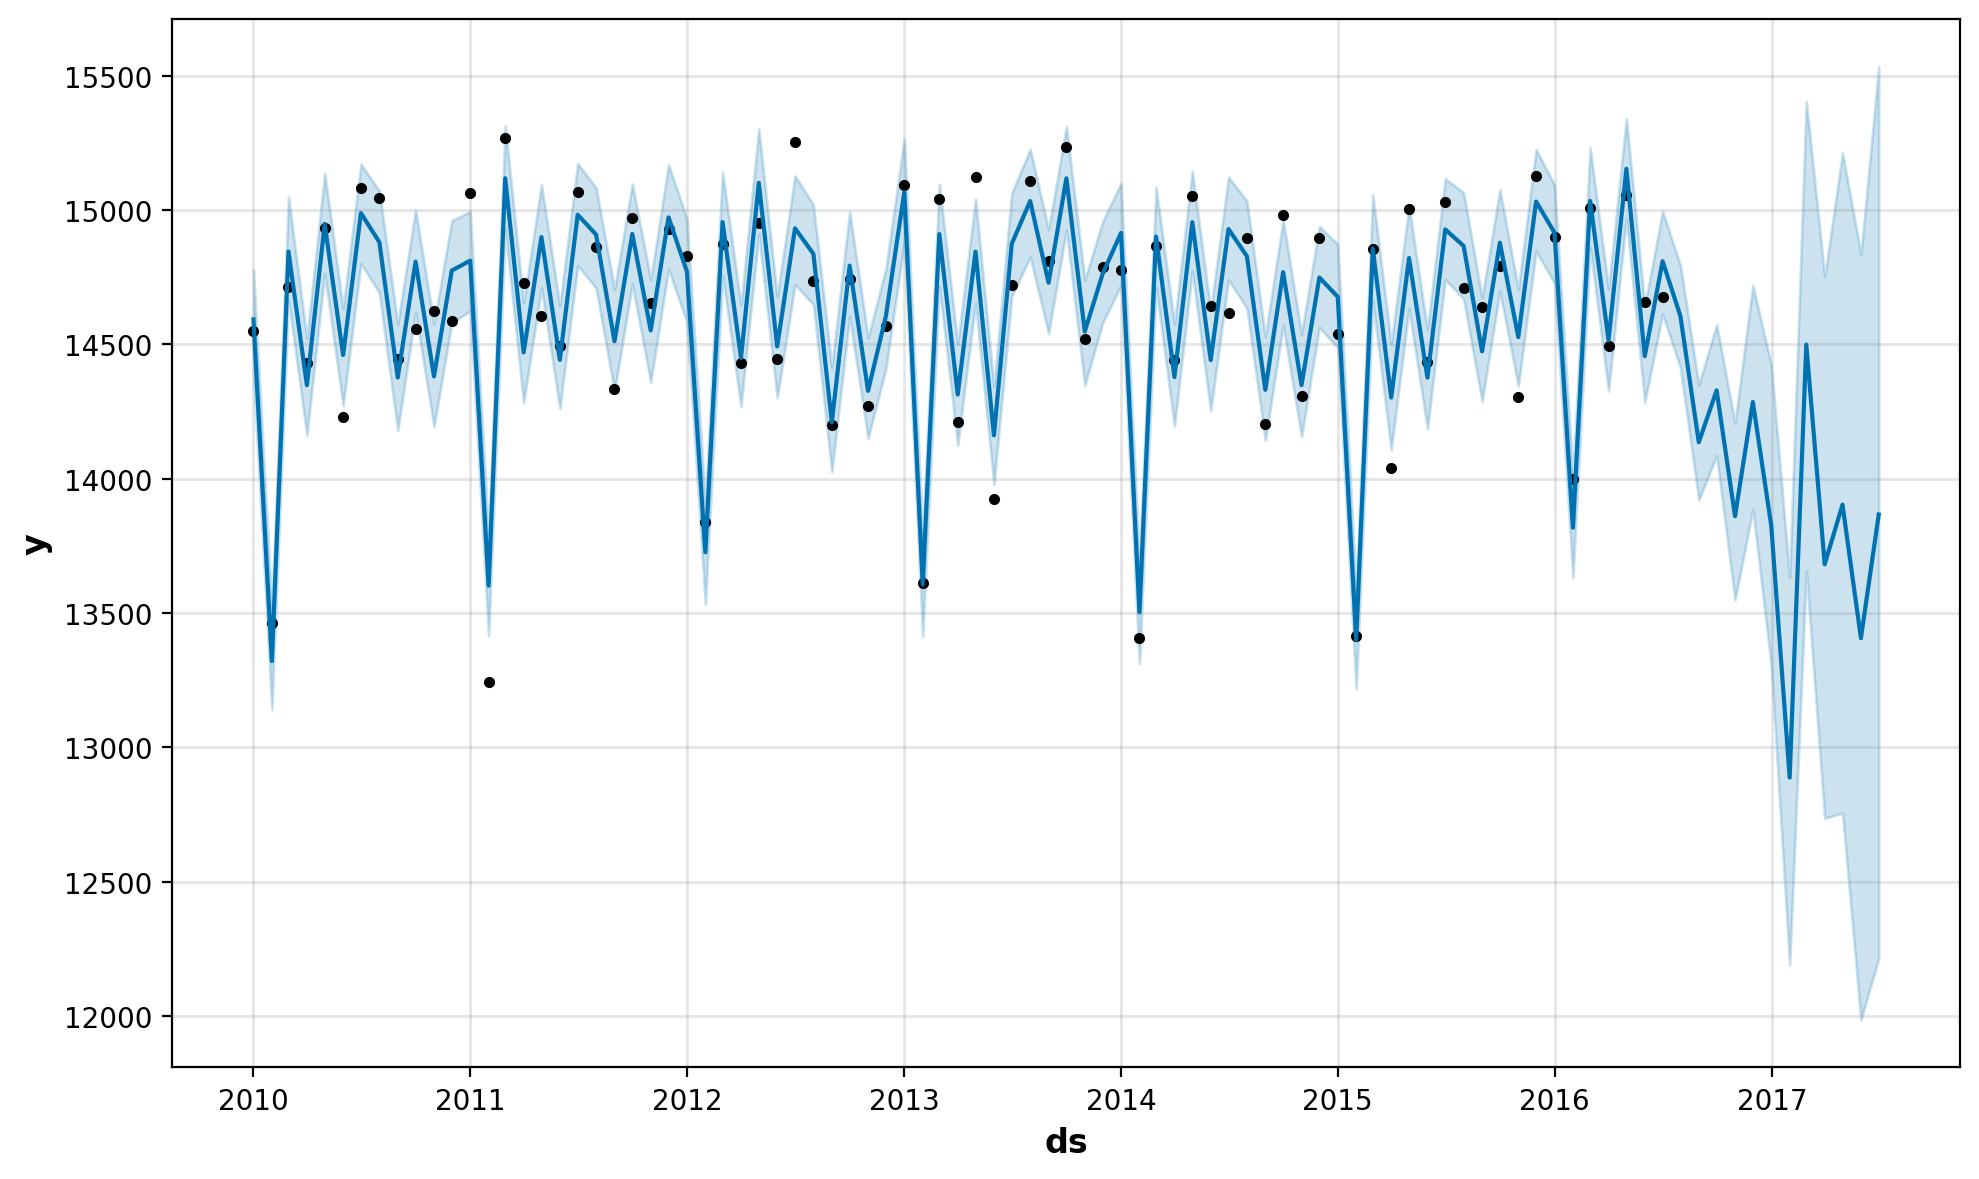

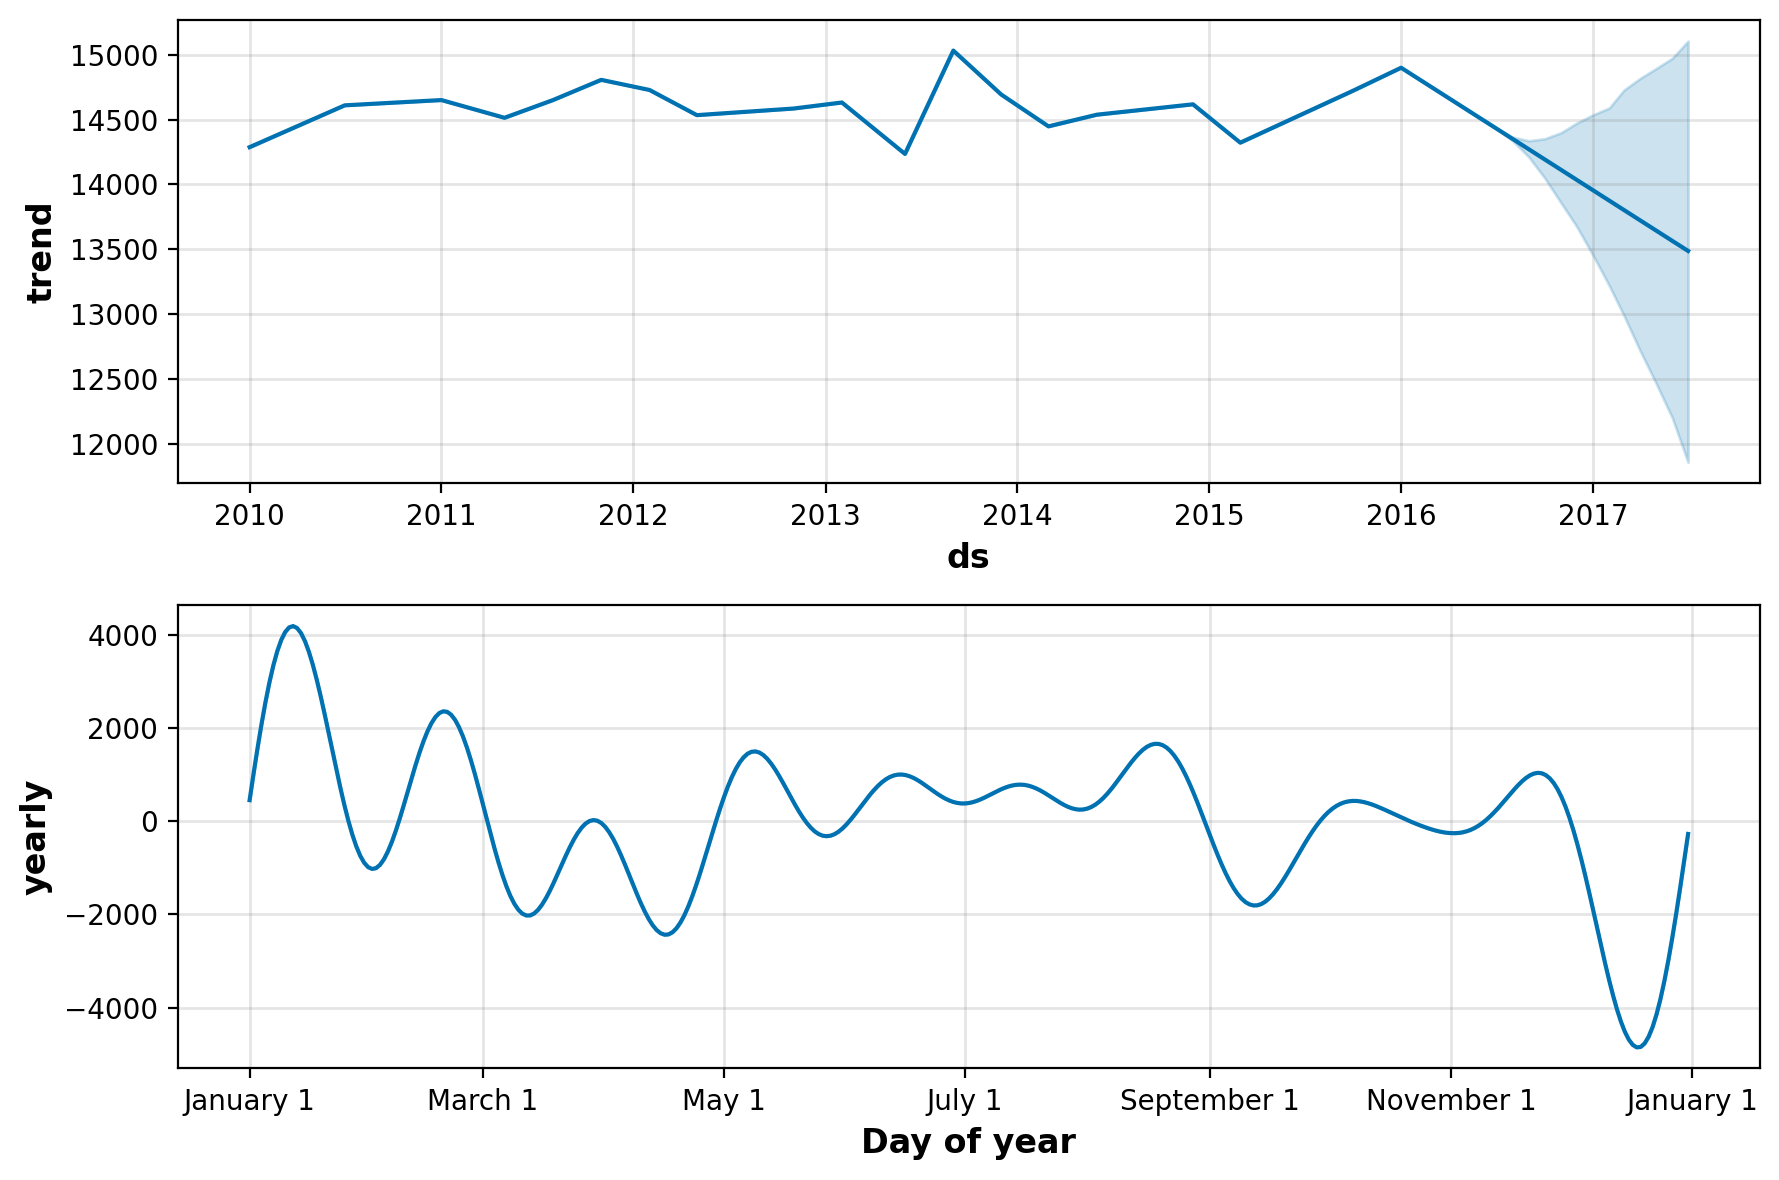

In [ ]:
#train test split (last 12 data points for 1 year)
ts_test = ts.iloc[-12:,:]
ts_train = ts.iloc[:-12,:]

#instantiate the model and fit the time-series
m = Prophet(yearly_seasonality=True, changepoint_range=1,changepoint_prior_scale=1)
m.fit(ts_train)

future = m.make_future_dataframe(periods=12 * 1, freq='M')
forecast = m.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

#plotting outcome
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

##ACF & PACF

<Figure size 1200x400 with 0 Axes>

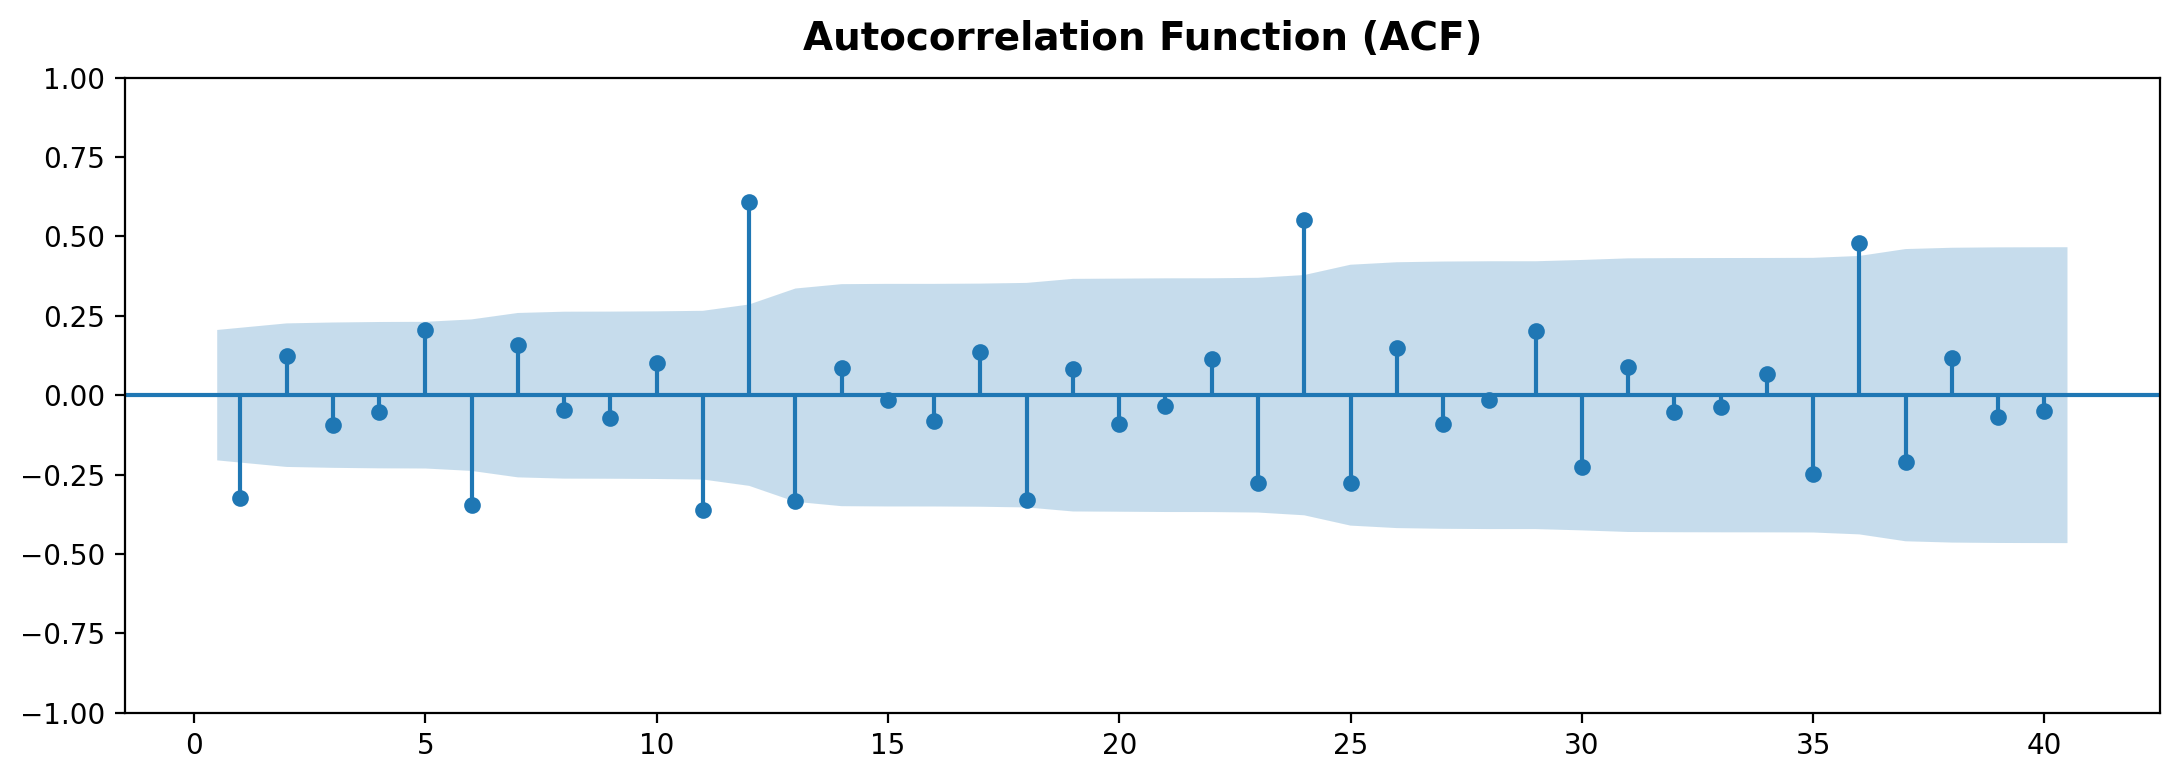

<Figure size 1200x400 with 0 Axes>

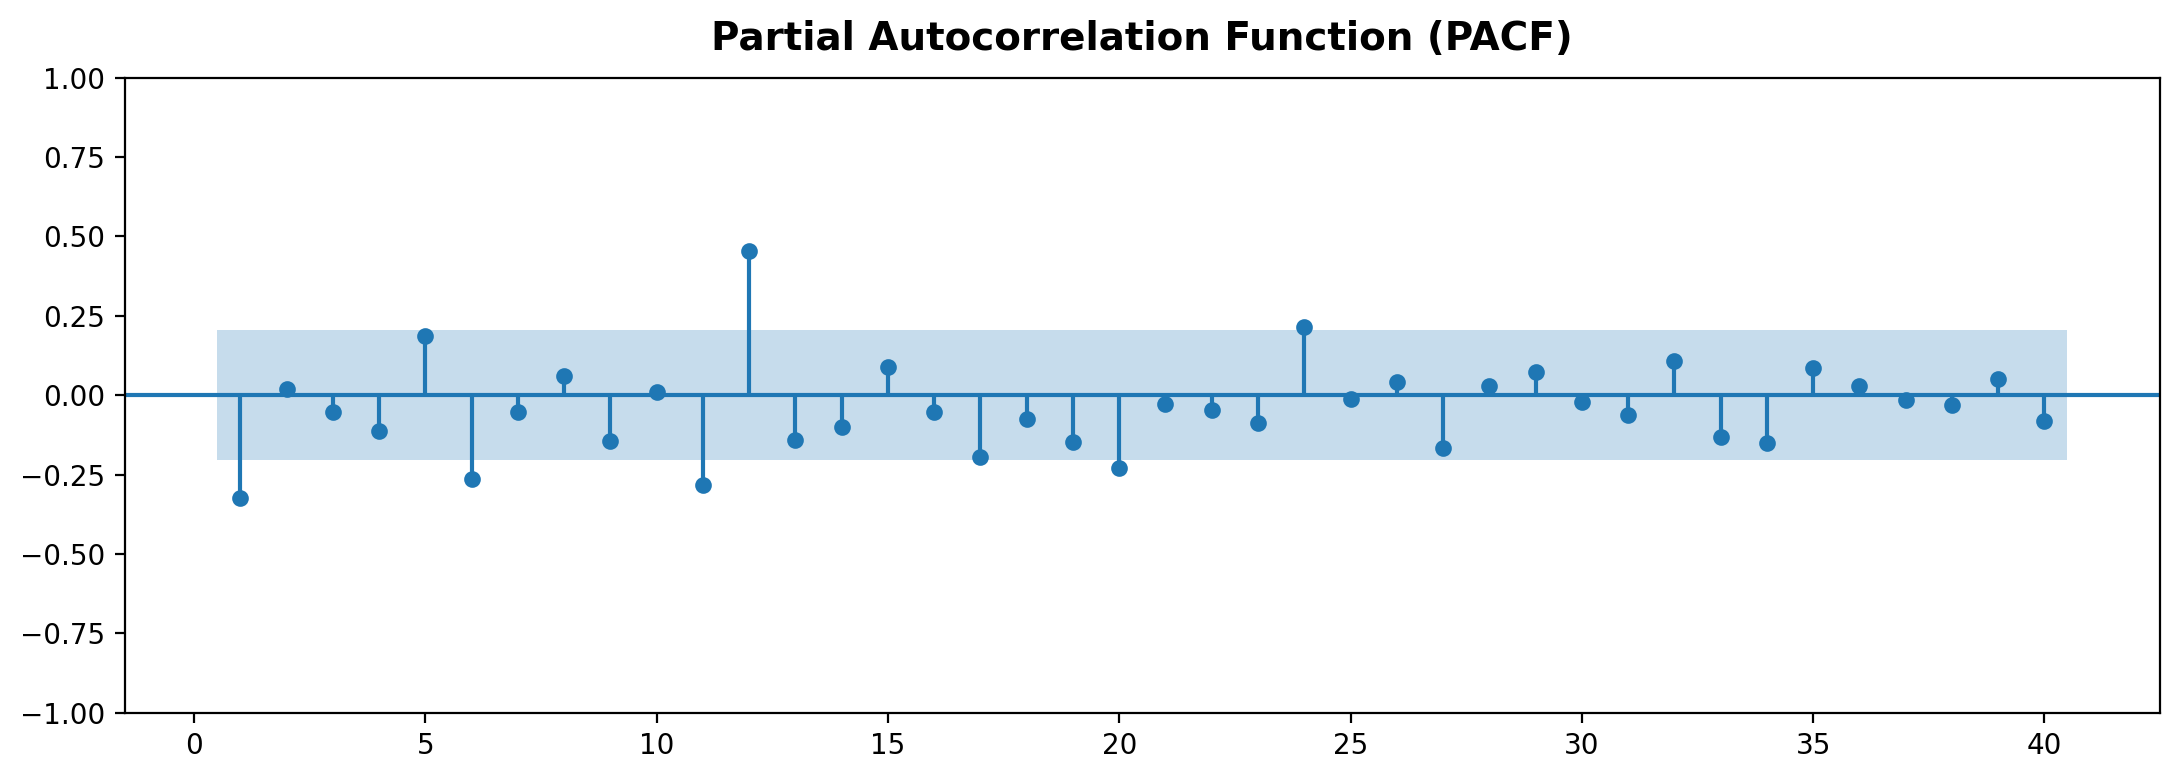

In [ ]:



# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(df_agg['Total Revenue'], lags=40, zero=False)  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(df_agg['Total Revenue'], lags=40, zero=False)  # Adjust 'lags' as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


#Conclusion

After running both ARIMA and SARIMA using the best hyperparameters (from tuning) we can conclude that SARIMA produced better results as seasonal component is present in our dataset (annual frequency).

The final results from evaluation metrics, RMSE and MAE both produce a lower error for SARIMA, mentioned below:

ARIMA
* RMSE: 692.151
* MAE: 534.061

SARIMA
* RMSE: 412.061
* MAE: 320.800

#Another Simpler Example for understanding

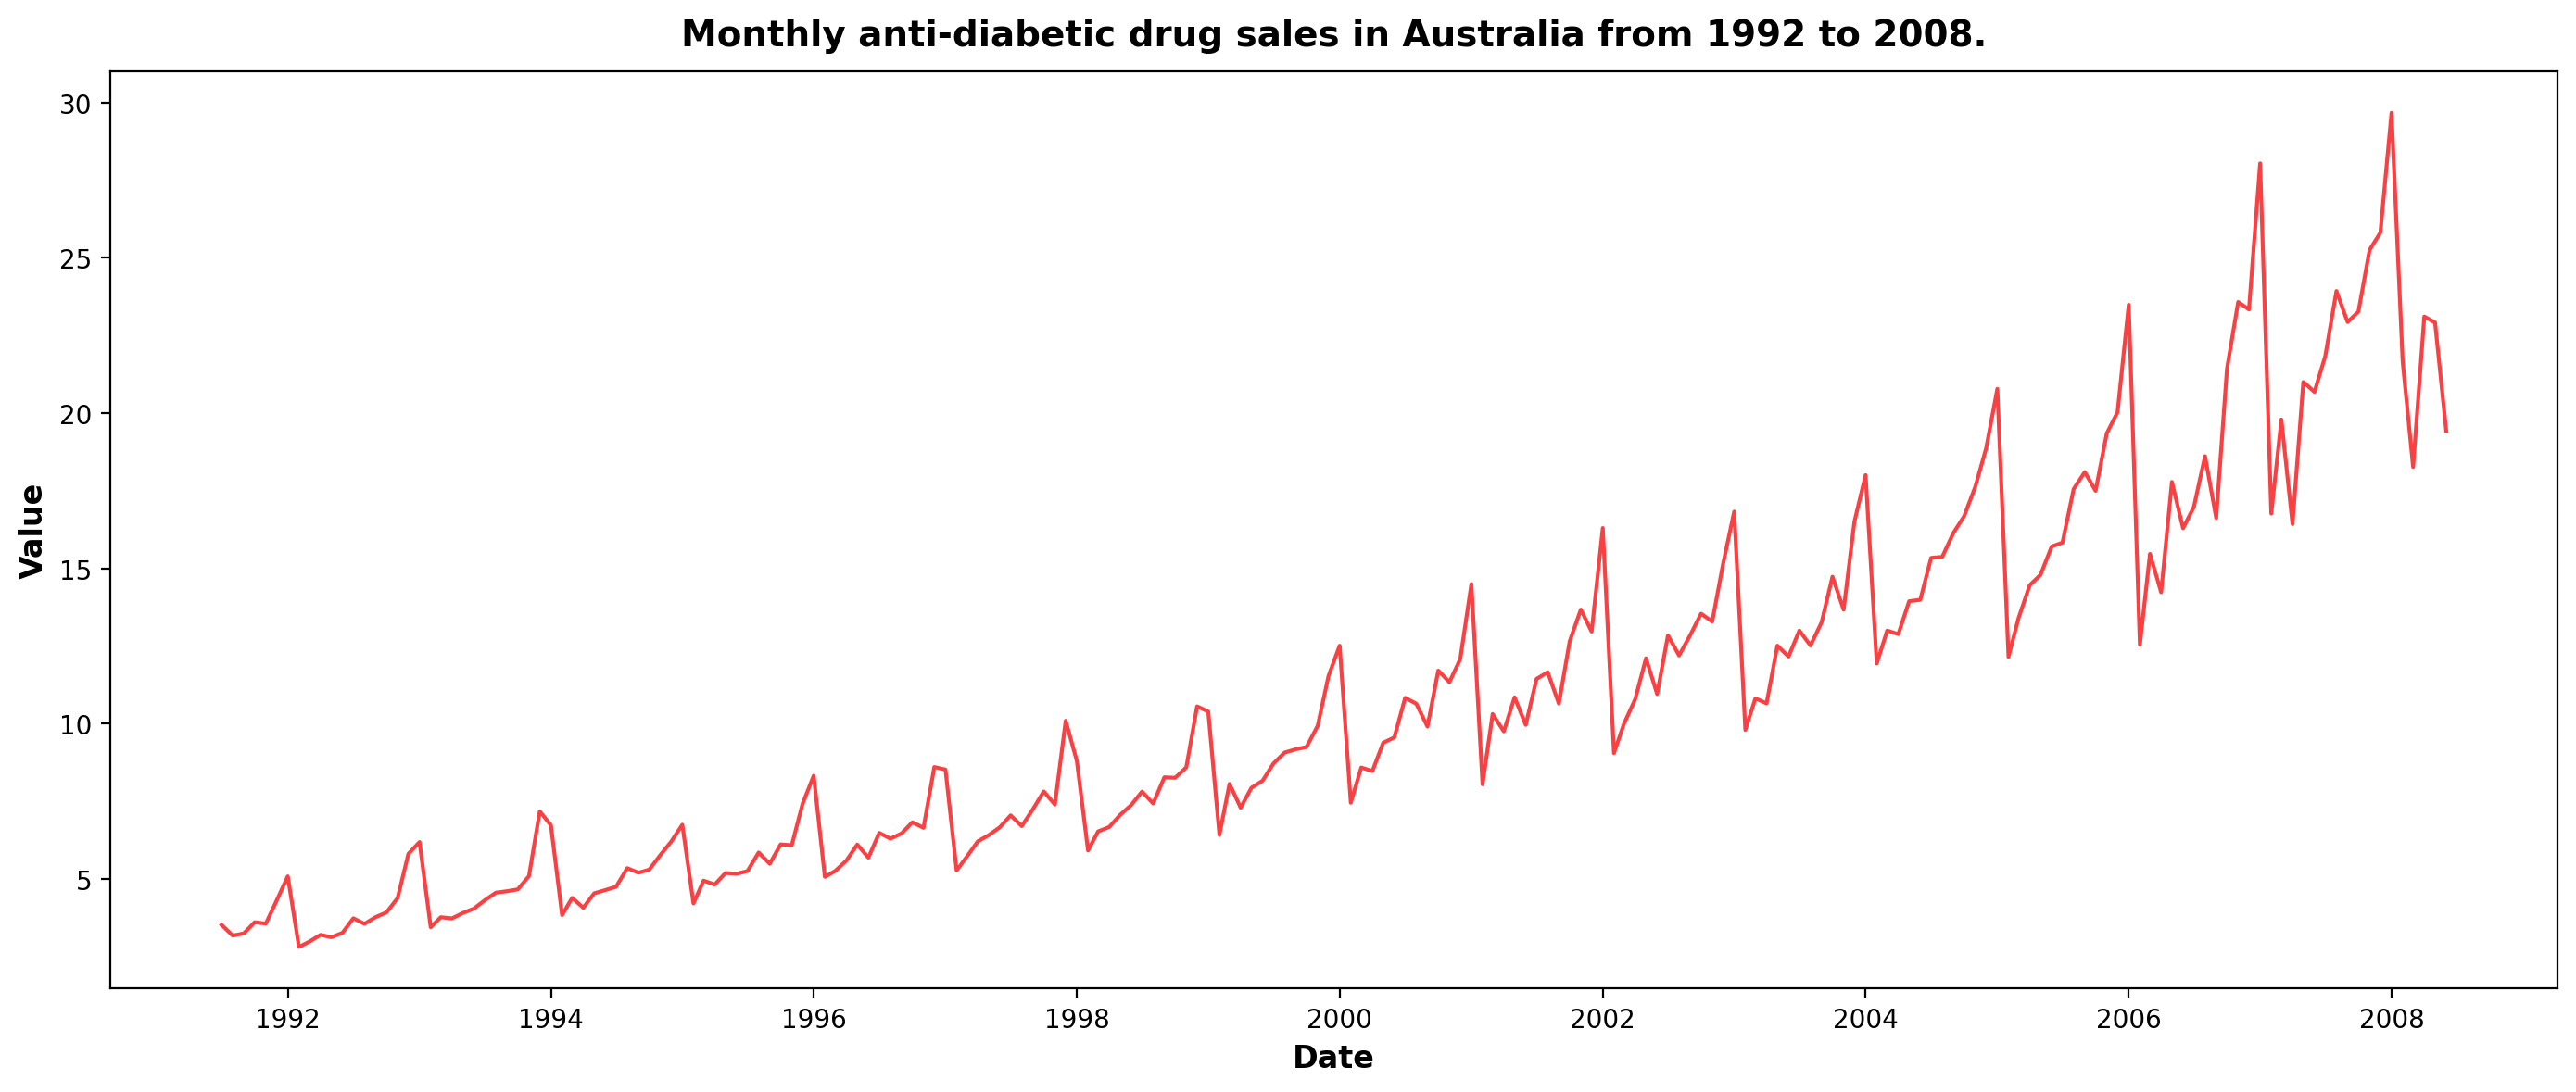

In [ ]:
# Time series data source

aust_drug_df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(14,6), dpi=dpi)
    plt.plot(x, y, color='#F94144')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(aust_drug_df, x=aust_drug_df.index, y=aust_drug_df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

In [ ]:
aust_drug_df['RevenueDiff1'] = aust_drug_df['value'].diff().fillna(0)
aust_drug_df

value  RevenueDiff1
date                               
1991-07-01   3.526591      0.000000
1991-08-01   3.180891     -0.345700
1991-09-01   3.252221      0.071330
1991-10-01   3.611003      0.358782
1991-11-01   3.565869     -0.045134
...               ...           ...
2008-02-01  21.654285     -8.011071
2008-03-01  18.264945     -3.389340
2008-04-01  23.107677      4.842732
2008-05-01  22.912510     -0.195167
2008-06-01  19.431740     -3.480770

[204 rows x 2 columns]

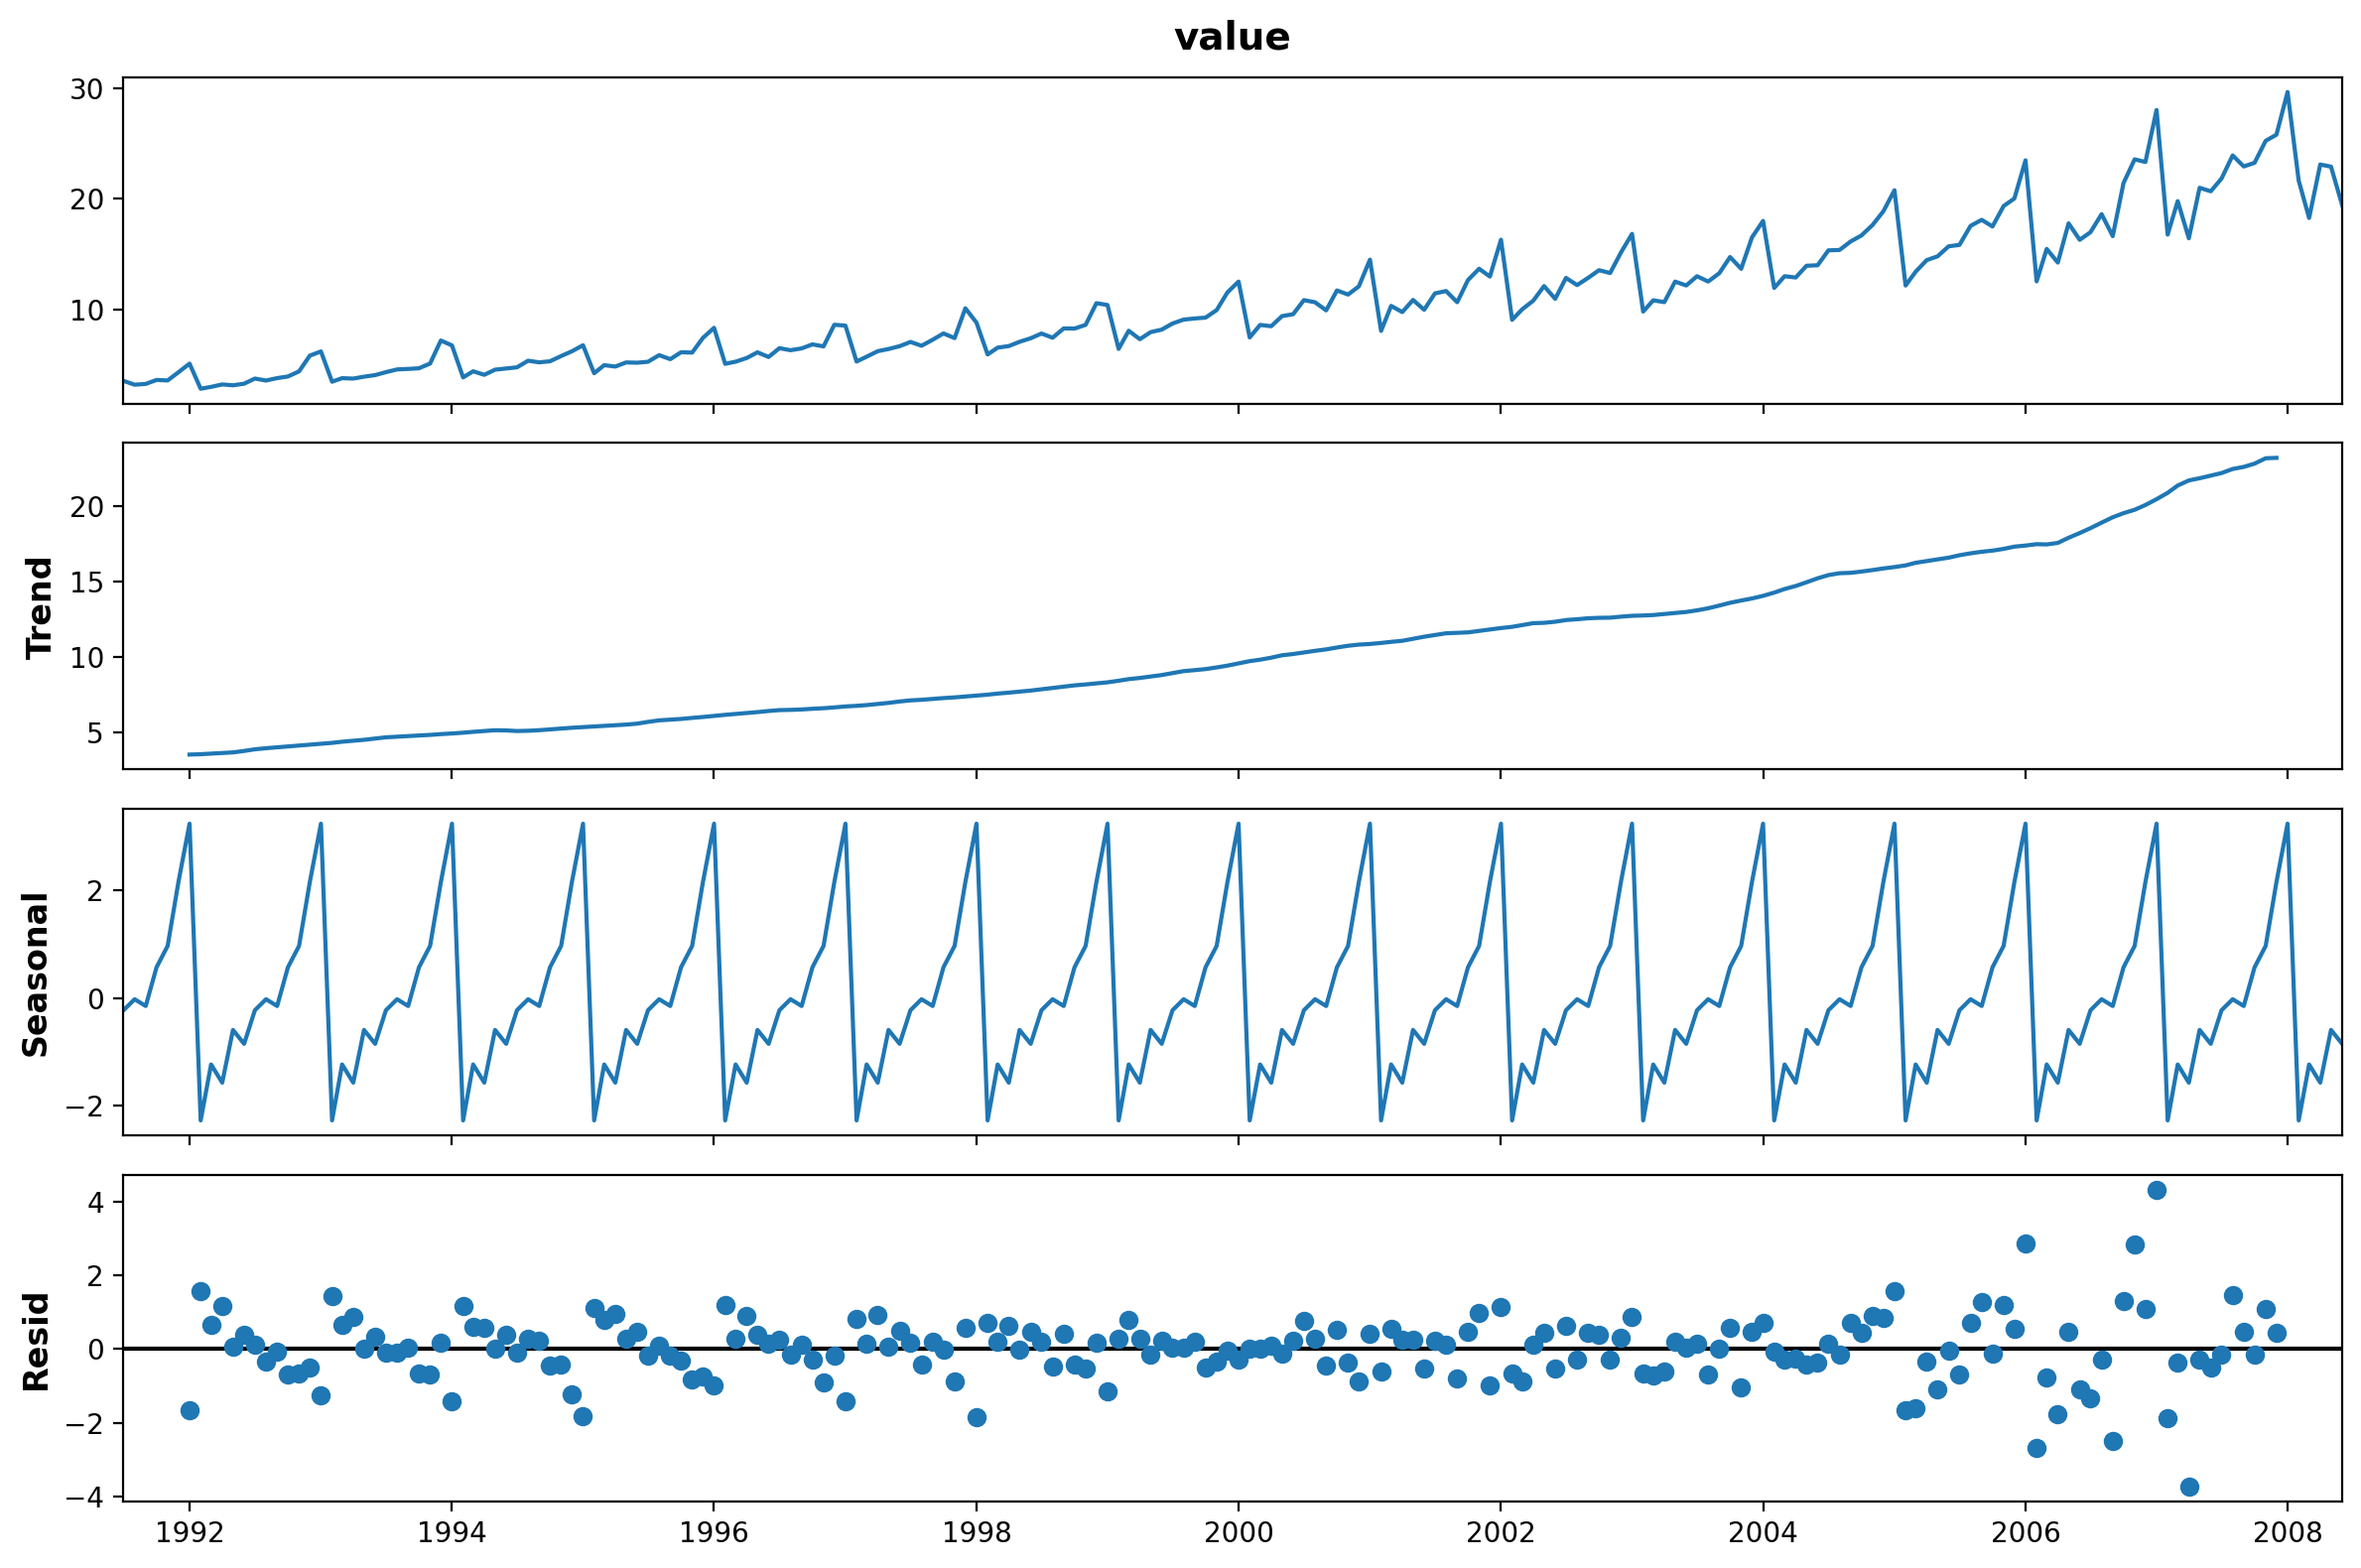

In [ ]:

rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(aust_drug_df.value, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

In [ ]:
#seasonal False - fit stepwise auto-ARIMA
arima_model = auto_arima(aust_drug_df['RevenueDiff1'], start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=858.703, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=908.586, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=881.504, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=867.517, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=860.043, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=860.318, Time=0.39 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=861.393, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=879.107, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=851.128, Time=1.36 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=853.045, Time=0.83 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=862.585, Time=0.55 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=860.673, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=860.352, Time=0.36 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=848.186, Time=2.09 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, 

Calling ARIMA Model:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

Test RMSE: 3.496
Test R2: -0.069
Test MAE: 2.644


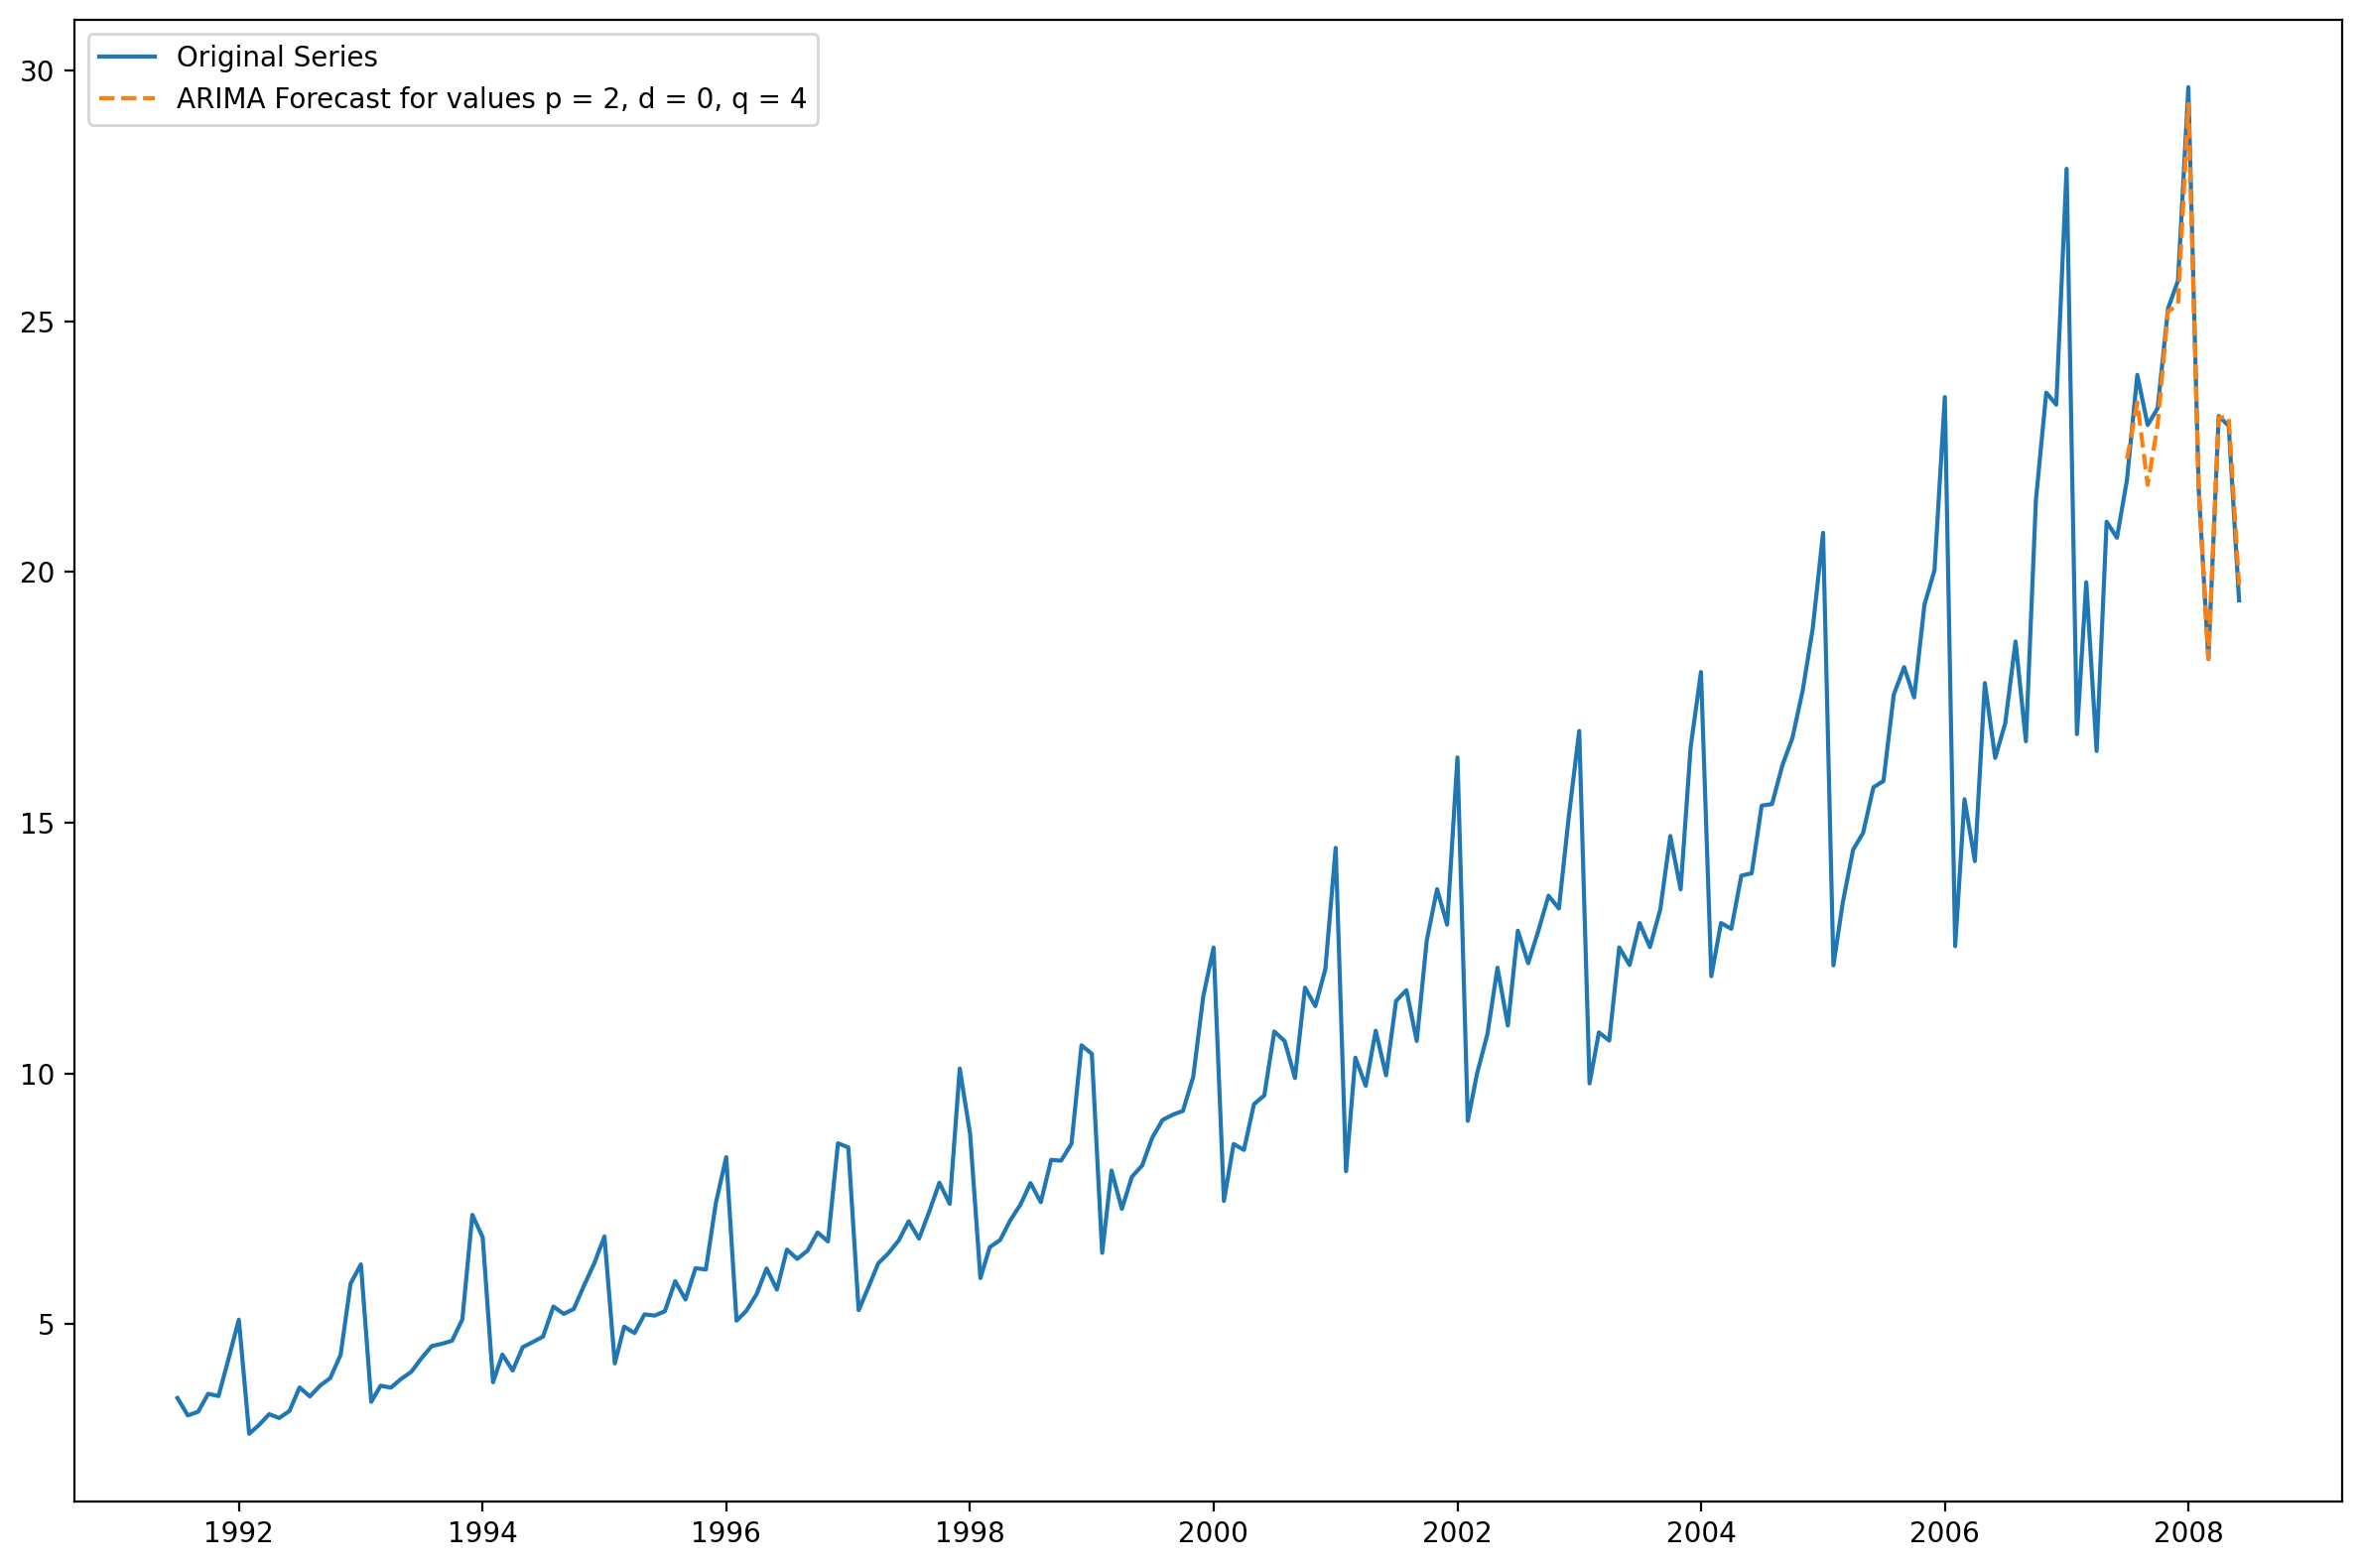

In [ ]:
print('Calling ARIMA Model:')
arima_rmse, arima_r2s, arima_mae = arima_calc_rmse_r2(aust_drug_df, 'value', 'RevenueDiff1', 12, 2, 0, 4)

In [ ]:
#seasonal True - fit stepwise auto-ARIMA
arima_model = auto_arima(aust_drug_df['RevenueDiff1'], start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=529.065, Time=0.80 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=663.801, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=564.758, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=531.871, Time=0.69 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=661.803, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.091, Time=0.23 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=530.520, Time=1.32 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=530.109, Time=5.54 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=534.753, Time=1.68 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=532.511, Time=7.50 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=557.195, Time=0.79 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=533.629, Time=1.74 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=530.938, Time=5.21 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=639.224, Time=0.79 sec
 ARIMA(0,0,2)(0,1,1)[12] intercep

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test RMSE: 3.626
Test R2: -0.150
Test MAE: 2.726


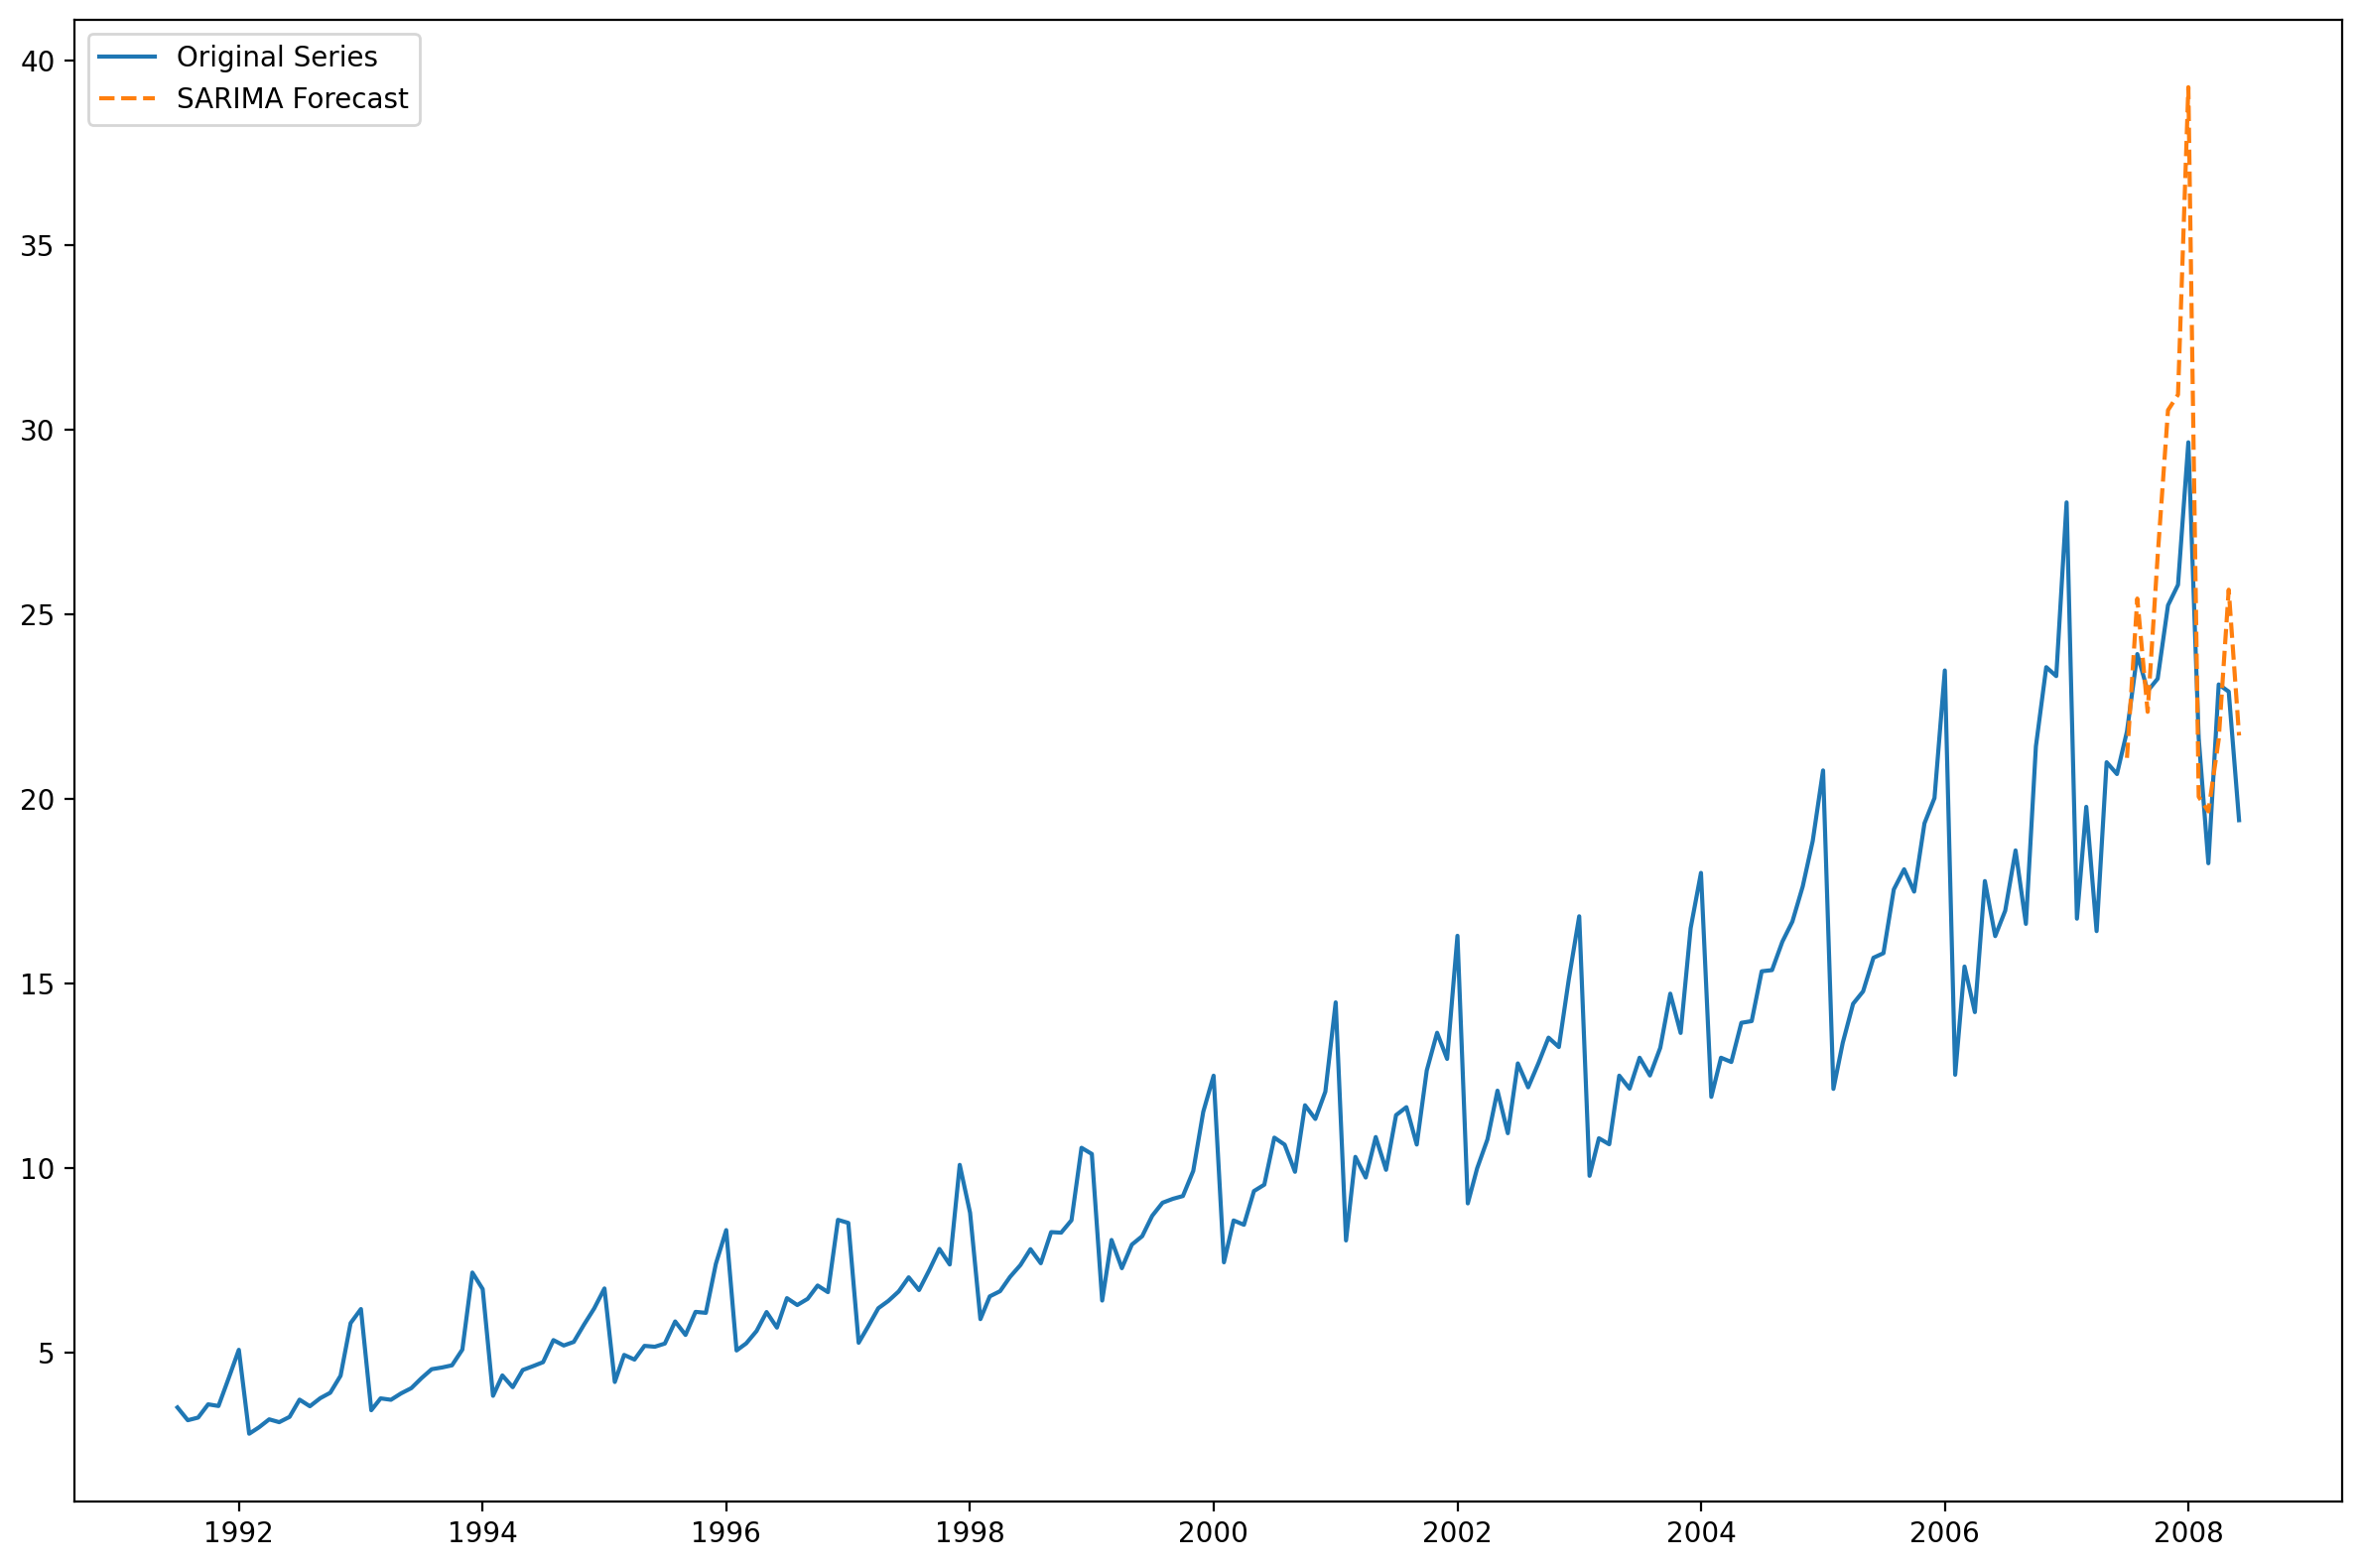

In [ ]:
#split dataset for test and training
X = aust_drug_df['RevenueDiff1']
train, test = X[1:len(X)-12], X[len(X)-12:]

differenced_series = aust_drug_df['RevenueDiff1']


# Specify the orders (p, d, q) and seasonal orders (P, D, Q, S) of the SARIMA model
p = 3  # Replace with the desired AR order
d = 0  # Replace with the desired differencing order
q = 2  # Replace with the desired MA order
P = 0  # Replace with the desired seasonal AR order
D = 1  # Replace with the desired seasonal differencing order
Q = 1  # Replace with the desired seasonal MA order
S = 12  # Replace with the length of the seasonal cycle (e.g., 12 for monthly data)

# Fit the SARIMA model
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_results = sarima_model.fit()

#print(sarima_results.summary())

sarima_forecast = sarima_results.predict(start=len(train), end=len(train)+len(test)-1,)

rmse = sqrt(mean_squared_error(test, sarima_forecast))
print('Test RMSE: %.3f' % rmse)
r2s = r2_score(test, sarima_forecast)
print('Test R2: %.3f' % r2s)
mae = mean_absolute_error(test, sarima_forecast)
print('Test MAE: %.3f' % mae)

# If differencing was applied, backtransform the forecast to the original scale
original_forecast = sarima_forecast.cumsum() + aust_drug_df['value']


# Plot the original series and the forecast
plt.plot(aust_drug_df['value'], label='Original Series')
plt.plot(original_forecast, label='SARIMA Forecast', linestyle='dashed')
plt.legend()
plt.show()


#References:

https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/#Converting_Non-Stationary_Into_Stationary


https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a


https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/#:~:text=There%20are%20various%20statistical%20tests,unit%20root%20in%20the%20data.


https://towardsdatascience.com/time-series-forecasting-based-on-the-trend-and-seasonal-components-26b92866e548



https://www.geeksforgeeks.org/time-series-analysis-using-facebook-prophet/


https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a


https://medium.com/analytics-vidhya/time-series-forecasting-using-tbats-model-ce8c429442a9

https://www.influxdata.com/blog/forecasting-with-fb-prophet-and-influxdb/

